Aleksandra Bednarczuk

# Survey on Municipal Services of Barcelona's City

Source of the data: 

https://opendata-ajuntament.barcelona.cat/data/en/dataset/esm-bcn-evo

https://opendata-ajuntament.barcelona.cat/doc/BackOff_DescCompDefCamps/EnquestaServeisMunicipals_BCN/2019_Any/2019_r19006_ESM_Questionari_v1_0.pdf

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1.1. Reading the data

In [182]:
survey = pd.read_csv('data/survey/2019_r19006_esm_evolucio_bdd_v1_0/2019_r19006_esm_evolucio_bdd_v1_0.csv', low_memory=False)

In [183]:
survey.head()

,Unnamed: 0,ID,ANY,NOM_DISTRICTE,NOM_BARRI,DATA_ENQ,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,RES_HAB,PADRO,...,DEM_BARRI_N1,CONSULTA_DIARI_Q01_N1,CONSULTA_DIARI_Q02_N1,VEURE_TELE_Q01_N1,VEURE_TELE_Q02_N1,VEURE_TELE_Q03_N1,HAB_COTXE_PART_1A4,US30D_XARXES_Q06,US30D_XARXES_Q07,PMI_1A3_2017
0,1,198900001,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN
1,2,198900002,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ALTRES,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
2,3,198900003,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
3,4,198900004,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EL PERIÓDICO,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
4,5,198900005,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN


In [184]:
survey.columns.tolist()

['Unnamed: 0',
 'ID',
 'ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'DATA_ENQ',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'RES_HAB',
 'PADRO',
 'EVO1A_BCN',
 'EVO1A_CAT',
 'EVO1A_ESP',
 'FUTUR_BCN',
 'FUTUR_CAT',
 'FUTUR_ESP',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN',
 'PROB_CAT',
 'PROB_ESP',
 'PROB_PERS',
 'VAL_GESTMUNI',
 'VAL_GESTGENE',
 'VAL_GESTGOESP',
 'DEM_BCN_MUNI',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'EVO1A_ESCOMBRARIES',
 'EVO1A_NETEJA',
 'EVO1A_SOROLL',
 'EVO1A_VERD',
 'EVO1A_ENLLUM',
 'EVO1A_URBA',
 'EVO1A_ASFALT',
 'EVO1A_FACANES',
 'EVO1A_CIRCUL',
 'EVO1A_APARCA',
 'EVO1A_BUS',
 'EVO1A_METRO',
 'EVO1A_TRAM',
 'EVO1A_BICING',
 'EVO1A_GUB',
 'E

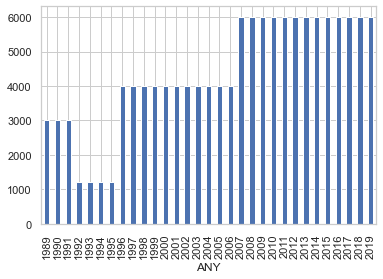

In [187]:
survey.groupby(['ANY']).size().plot.bar()

In [5]:
# survey = survey.query('ANY >= 2007')

# 1.2. Translating the data from Catalan to English and subsetting the DataFrame to only relevant columns (survey questions)

As the survey is conducted in Catalan, the data is also saved in this language. In this section the data is being translated into English. The translation was done by the author.

In [192]:
# Reading questions dataset with a flag indicating if the question is relevant for further analysis
questions = pd.read_excel('data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Preguntes_v1_0.xlsx')

In [7]:
# Filtering out unnecessary questions
questions = questions.query('Flag == 1')
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor
6,SEXE,1,SEXE,SEX,factor


In [8]:
# Dictionary with Catalan and Spanish names/descriptions of questions
df = questions[['Nom_variable', 'Question']]
questions_dict = {}
for i in range(len(df)):
    questions_dict[df.iloc[i].Nom_variable] = df.iloc[i].Question
questions_dict

{'ANY': 'SURVEY YEAR',
 'NOM_DISTRICTE': 'DISTRICT',
 'NOM_BARRI': 'BARRI',
 'GRANBARRI': 'GRAN BARRI',
 'SEXE': 'SEX',
 'EDAT1899_1A6': 'AGE',
 'NACIO_ACT_UE': 'WHAT IS YOUR NATIONALITY?',
 'TMP_RES_BCN_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?',
 'TMP_RES_BARRI_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?',
 'EVO1A_BCN': 'DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?',
 'FUTUR_BCN': 'FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?',
 'SATISF_RES_BCN_1A4': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED',
 'VAL_GESTMUNI_1A2': 'ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED',
 'VAL_ESCOMBRARIES_1A2': 'CITY SERVICES - RATE: GARBAGE COLLECTION - GROUPED',
 'VAL_NETEJA_1A2': 'CITY SERVICES - RATE: STREETS CLEANING - GROUPED',
 'VAL_

In [9]:
# Filtering the table by choosing only those questions which are relevant for further analysis
survey = survey[list(questions.Nom_variable.unique())]

In [10]:
survey.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,CLASSESOC_ENT,SENTPERTI,MUNI_VOTAR,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4,TE_CERT_DISCAP,HAB_CERT_DISC
57800,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,ESPANYOLA,MÉS DE 5 ANYS I FINS A 10 ANYS,MÉS DE 5 ANYS I FINS A 10 ANYS,HA MILLORAT,...,CLASSE MITJANA-MITJANA,MÉS ESPANYOL QUE CATALÀ,NaN,ESTRANGER,CASTELLÀ,SECUNDARIS PROFESSIONALS,PARELLA AMB FILLS,QUATRE O MÉS,NaN,NaN
57801,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 65 ANYS I MÉS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,SEMPRE HA VISCUT AL BARRI,HA MILLORAT,...,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,NaN,BARCELONA CIUTAT,CATALÀ,OBLIGATORIS,PARELLA SOLA,DUES,NaN,NaN
57802,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,SEMPRE HA VISCUT AL BARRI,ESTÀ IGUAL,...,CLASSE MITJANA-MITJANA,TAN ESPANYOL COM CATALÀ,NaN,BARCELONA CIUTAT,CASTELLÀ,UNIVERSITARIS,PARELLA AMB FILLS,QUATRE O MÉS,NaN,NaN
57803,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,DONA,DE 45 A 54 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 2 ANYS I FINS A 5 ANYS,HA MILLORAT,...,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,NaN,BARCELONA CIUTAT,CASTELLÀ,SECUNDARIS PROFESSIONALS,PERSONA SOLA,UNA,NaN,NaN
57804,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 35 A 44 ANYS,ALTRES UNIÓ EUROPEA,MÉS DE 10 ANYS,MÉS DE 10 ANYS,HA MILLORAT,...,CLASSE MITJANA-MITJANA,TAN ESPANYOL COM CATALÀ,NaN,ESTRANGER,CASTELLÀ,SECUNDARIS GENERALS,PARELLA SOLA,DUES,NaN,NaN


In [11]:
# Reading answers dataset with a flag indicating if the answer relates to the question
# which was tagged as relevant for further analysis or not
answers = pd.read_excel('data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Respostes_v1_0.xlsx')

In [12]:
answers = answers.query('Flag == 1')
answers.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


As the survey was conducted in Catalan or Spanish and the answers are recorded in Catalan it needs to be translated into English for better understanding of the responses. The survey was initially translated on metadata tables with questions (Preguntas) and answers (Respostes). Below, I create a dictionary translating_answers with question name (Nom_variable) as a key and temp_dict as a value. Temp_dict is a nested dictionary, with Catalan answer as a key and English translation of this answer as a value.


In [13]:
translating_answers = {}
for i in answers.Nom_variable.unique():
    temp_dict = {}
    temp_dict[str(np.nan)] = np.nan
    df = answers.query('Nom_variable == @i')
    for j in range(len(df)):
        temp_dict[str(df.iloc[j].Resposta)] = df.iloc[j].Answer
    translating_answers[i] = temp_dict

In [14]:
survey['VAL_BUS_1A2'].unique()

array(['APROVAT (5 A 10)', 'SUSPÈS (0 A 4)', 'NS / NC'], dtype=object)

In [15]:
translating_answers['VAL_BUS_1A2']

{'nan': nan,
 'SUSPÈS (0 A 4)': 'BAD (0 TO 4)',
 'APROVAT (5 A 10)': 'GOOD (5 TO 10)',
 'NS / NC': "I DON'T KNOW / NO ANSWER"}

In [16]:
# Using a for loop, the survey is being translated by replacing Catalan version of an answer
# with its English translation using translating_answers dictionary created above.
for column in [i for i in list(survey.columns) if i != "ANY"]:
    translate = translating_answers[column]
    for i in survey[column].unique():
        survey[column].replace(i, translate[str(i)], inplace=True)

In [17]:
survey['VAL_BUS_1A2'].unique()

array(['GOOD (5 TO 10)', 'BAD (0 TO 4)', "I DON'T KNOW / NO ANSWER"],
      dtype=object)

# 1.3. Subsetting the data to 2008-2019 surveys with responses of people aged 65+ 
For further analysis we will use the data from 2008-2019 Surveys with responses of people aged 65 years and more. Data from 2008-2018 will be used for training the models and data from 2019 - for testing.

In [18]:
survey_65 = survey.query('EDAT1899_1A6 == "65 YEARS AND OVER"')

In [19]:
survey_65.shape

(19582, 103)

In [20]:
for i in survey_65.columns:
    if survey_65[i].isnull().values.any() == True:
        print(i, survey_65[i].isnull().values.any())

VAL_SOROLL_1A2 True
VAL_TRAM_1A2 True
VAL_BICING_1A2 True
VAL_SPEIS_1A2 True
VAL_CC_1A2 True
EVO1A_TRAM True
EVO1A_BICING True
EVO1A_SPEIS True
EVO1A_CC True
US_APARCA True
US_TRAM True
US_BICING True
US_CC True
HAB_TREBDOM True
HAB_REGIM_1A5 True
MUNI_VOTAR True
TE_CERT_DISCAP True
HAB_CERT_DISC True


In [21]:
for i in survey_65.columns:
    if survey_65[i].isnull().sum() > 1 :
        print(i, survey_65[i].isnull().sum())

VAL_SOROLL_1A2 1441
VAL_TRAM_1A2 16602
VAL_BICING_1A2 1441
VAL_SPEIS_1A2 16602
VAL_CC_1A2 10433
EVO1A_TRAM 15102
EVO1A_BICING 1441
EVO1A_SPEIS 16602
EVO1A_CC 10433
US_APARCA 4371
US_TRAM 15102
US_BICING 1441
US_CC 10433
HAB_TREBDOM 16602
HAB_REGIM_1A5 16602
MUNI_VOTAR 5840
TE_CERT_DISCAP 18100
HAB_CERT_DISC 18100


Columns listed above have many NA values and as these are categorical variables. Those with the highest number of NAs are being removed.

In [22]:
del survey_65['VAL_TRAM_1A2']
del survey_65['EVO1A_TRAM']
del survey_65['US_TRAM'] 
del survey_65['VAL_BICING_1A2']
del survey_65['EVO1A_BICING']
del survey_65['US_BICING']
del survey_65['VAL_CC_1A2']
del survey_65['EVO1A_CC']
del survey_65['US_CC']
del survey_65['VAL_SPEIS_1A2']
del survey_65['EVO1A_SPEIS']
del survey_65['US_APARCA']
del survey_65['HAB_TREBDOM'] 
del survey_65['HAB_REGIM_1A5']
del survey_65['TE_CERT_DISCAP']
del survey_65['HAB_CERT_DISC']

In [23]:
for i in survey_65.columns:
    if survey_65[i].isnull().values.any() == True:
        print(i, survey_65[i].isnull().values.any())

VAL_SOROLL_1A2 True
MUNI_VOTAR True


In [24]:
for i in survey_65.columns:
    if survey_65[i].isnull().sum() > 1 :
        print(i, survey_65[i].isnull().sum())

VAL_SOROLL_1A2 1441
MUNI_VOTAR 5840


In [25]:
survey_65 = survey_65.query('ANY >= 2011').query('EDAT1899_1A6 == "65 YEARS AND OVER"')

In [26]:
for i in survey_65.columns:
    if survey_65[i].isnull().values.any() == True:
        print(i, survey_65[i].isnull().values.any())

In [27]:
for i in survey_65.columns:
    if survey_65[i].isnull().sum() > 1 :
        print(i, survey_65[i].isnull().sum())

After limiting the dataset to surveys from 2011-2019 there are no NA values.

In [28]:
# Creating a copy of the data subset for further data preparation and features generation
data = survey_65.copy()

In [29]:
survey_65.shape, data.shape

((13742, 87), (13742, 87))

# 1.4. Exploratory Data Analysis and data preparation

In [30]:
for i in survey_65.columns.tolist():
    print(i, ":", questions_dict[i])

ANY : SURVEY YEAR
NOM_DISTRICTE : DISTRICT
NOM_BARRI : BARRI
GRANBARRI : GRAN BARRI
SEXE : SEX
EDAT1899_1A6 : AGE
NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
SATISF_RES_BCN_1A4 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED
VAL_GESTMUNI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED
VAL_ESCOMBRARIES_1A2 : CITY SERVICES - RATE: GARBAGE COLLECTION - GROUPED
VAL_NETEJA_1A2 : CITY SERVICES - RATE: STREETS CLEANING - GROUPED
VAL_SOROLL_1A2 : CITY SERVICES - RATE: NOISE - GROUPED
VAL_VERD_1A2 : CITY SERVIC

## 1.4.1 Dependent variable

Survey question: IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?

In [31]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size()

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           124
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     1321
I WOULD LIVE OUTSIDE BARCELONA                        1798
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         10498
NO ANSWER                                                1
dtype: int64

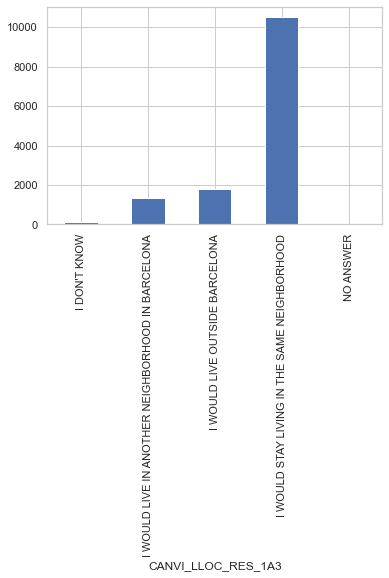

In [32]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size().plot.bar()

In [33]:
data_prep = {'I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD': 0,
            'I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA': 1,
             'I WOULD LIVE OUTSIDE BARCELONA': 1,
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan
            }
data['Would_not_stay_in_the_neighborhood'] = [data_prep[i] for i in data['CANVI_LLOC_RES_1A3']]

In [34]:
count_stay = len(data[data['Would_not_stay_in_the_neighborhood']==0])
count_move = len(data[data['Would_not_stay_in_the_neighborhood']==1])
pct_of_stay = count_stay/len(data)
print("Number of elderly who would stay in their neighborhood:", count_stay)
print("Percentage of elderly who would stay in their neighborhood:", round(pct_of_stay*100,2), '%')
pct_of_move = count_move/len(data)
print("Number of elderly who would hange their neighborhood or move out from the city:", count_move)
print("Percentage of elderly who would change their neighborhood or move out from the city:", round(pct_of_move*100,2), '%')

Number of elderly who would stay in their neighborhood: 10498
Percentage of elderly who would stay in their neighborhood: 76.39 %
Number of elderly who would hange their neighborhood or move out from the city: 3119
Percentage of elderly who would change their neighborhood or move out from the city: 22.7 %


The dataset is highly inbalances - there are more responses of people who would like to stay in their neighborhood than of those who would like to change it or move outside Barcelona. To be able to find the predictors of willigness to stay, I will have to oversample the minority class.

## 1.4.2 Independent variables

First insight into the dataset using cross tablation of dependent variable and different features:

In [35]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
ANY,,
2011,1131,357
2012,1149,372
2013,1204,333
2014,1195,341
2015,1225,324
2016,1245,307
2017,1225,264
2018,1059,423
2019,1065,398


Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,679,296
EIXAMPLE,1769,387
GRÀCIA,868,212
HORTA - GUINARDÓ,1200,366
LES CORTS,969,135
NOU BARRIS,1051,471
SANT ANDREU,867,281
SANT MARTÍ,1239,399
SANTS - MONTJUÏC,898,405


Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_BARRI,,
BARÓ DE VIVER,17,13
CAN BARÓ,57,28
CAN PEGUERA,15,5
CANYELLES,78,27
CIUTAT MERIDIANA,50,96
...,...,...
VALLBONA,7,12
VALLCARCA I ELS PENITENTS,133,29
"VALLVIDRERA, EL TIBIDABO I LES PLANES",24,5


Would_not_stay_in_the_neighborhood,0.0,1.0
GRANBARRI,,
"CANYELLES, LES ROQUETES I LA TRINITAT NOVA",239,124
EL BARRI GÒTIC,163,48
"EL BESÒS, EL MARESME I PROVENÇALS",209,99
EL CAMP D'EN GRASSOT I GRÀCIA NOVA,314,68
EL CARMEL I CAN BARÓ,249,127
EL CLOT I EL CAMP DE L'ARPA,258,91
EL FORT PIENC,270,77
EL GUINARDÓ,288,86
"EL PARC, LA LLACUNA I LA VILA OLÍMPICA",212,58


Would_not_stay_in_the_neighborhood,0.0,1.0
SEXE,,
MAN,4099,1363
WOMAN,6399,1756


Would_not_stay_in_the_neighborhood,0.0,1.0
EDAT1899_1A6,,
65 YEARS AND OVER,10498,3119


Would_not_stay_in_the_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,88,15
REMAINING COUNTRIES,88,32
SPANISH,10322,3072


Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,37,20
I HAVE ALWAYS LIVED IN THE CITY,4402,1281
MORE THAN 10 YEARS,5931,1768
MORE THAN 2 YEARS AND UP TO 5 YEARS,60,23
MORE THAN 5 YEARS AND UP TO 10 YEARS,68,27


Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,118,58
I HAVE ALWAYS LIVED IN THE BARRI,1449,296
LESS THAN SIX MONTHS,33,16
MORE THAN 10 YEARS,8525,2547
MORE THAN 2 YEARS AND UP TO 5 YEARS,143,89
MORE THAN 5 YEARS AND UP TO 10 YEARS,230,113


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,288,82
IT HAS IMPROVED,3355,731
IT'S THE SAME,2858,715
IT'S WORSE,3992,1585
NO ANSWER,5,6


Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1609,464
IT WILL IMPROVE,5385,1331
IT WILL STAY THE SAME,1024,310
IT WILL WORSE,2471,1008
NO ANSWER,9,6


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_1A4,,
FAIRLY SATISFIED (5 to 6),883,569
I DON'T KNOW / NO ANSWER,42,13
LITTLE / NOT SATISFIED (0 TO 4),190,255
SATISFIED (7 TO 8),4328,1306
VERY SATISFIED (9 TO 10),5055,976


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTMUNI_1A2,,
BAD (0 TO 4),1584,733
GOOD (5 TO 10),8413,2255
I DON'T KNOW / NO ANSWER,501,131


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES_1A2,,
BAD (0 TO 4),504,258
GOOD (5 TO 10),9954,2848
I DON'T KNOW / NO ANSWER,40,13


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA_1A2,,
BAD (0 TO 4),1568,716
GOOD (5 TO 10),8903,2398
I DON'T KNOW / NO ANSWER,27,5


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SOROLL_1A2,,
BAD (0 TO 4),2940,1297
GOOD (5 TO 10),7223,1751
I DON'T KNOW / NO ANSWER,335,71


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD_1A2,,
BAD (0 TO 4),1591,743
GOOD (5 TO 10),8396,2273
I DON'T KNOW / NO ANSWER,511,103


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM_1A2,,
BAD (0 TO 4),882,374
GOOD (5 TO 10),9430,2691
I DON'T KNOW / NO ANSWER,186,54


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA_1A2,,
BAD (0 TO 4),1064,544
GOOD (5 TO 10),8176,2209
I DON'T KNOW / NO ANSWER,1258,366


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT_1A2,,
BAD (0 TO 4),2122,912
GOOD (5 TO 10),8246,2169
I DON'T KNOW / NO ANSWER,130,38


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES_1A2,,
BAD (0 TO 4),1076,511
GOOD (5 TO 10),8748,2441
I DON'T KNOW / NO ANSWER,674,167


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL_1A2,,
BAD (0 TO 4),3066,1142
GOOD (5 TO 10),6873,1836
I DON'T KNOW / NO ANSWER,559,141


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA_1A2,,
BAD (0 TO 4),5709,1948
GOOD (5 TO 10),3150,773
I DON'T KNOW / NO ANSWER,1639,398


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BUS_1A2,,
BAD (0 TO 4),893,403
GOOD (5 TO 10),9023,2568
I DON'T KNOW / NO ANSWER,582,148


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_METRO_1A2,,
BAD (0 TO 4),266,134
GOOD (5 TO 10),8891,2666
I DON'T KNOW / NO ANSWER,1341,319


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB_1A2,,
BAD (0 TO 4),1722,778
GOOD (5 TO 10),7494,1996
I DON'T KNOW / NO ANSWER,1282,345


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_1A2,,
BAD (0 TO 4),3167,1239
GOOD (5 TO 10),6799,1729
I DON'T KNOW / NO ANSWER,532,151


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI_1A2,,
BAD (0 TO 4),2505,1207
GOOD (5 TO 10),7862,1866
I DON'T KNOW / NO ANSWER,131,46


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT_1A2,,
BAD (0 TO 4),834,463
GOOD (5 TO 10),5379,1574
I DON'T KNOW / NO ANSWER,4285,1082


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC_1A2,,
BAD (0 TO 4),555,282
GOOD (5 TO 10),6946,2028
I DON'T KNOW / NO ANSWER,2997,809


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS_1A2,,
BAD (0 TO 4),712,359
GOOD (5 TO 10),5350,1458
I DON'T KNOW / NO ANSWER,4436,1302


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT_1A2,,
BAD (0 TO 4),350,200
GOOD (5 TO 10),6915,1922
I DON'T KNOW / NO ANSWER,3233,997


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP_1A2,,
BAD (0 TO 4),624,335
GOOD (5 TO 10),7482,1998
I DON'T KNOW / NO ANSWER,2392,786


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT_1A2,,
BAD (0 TO 4),628,289
GOOD (5 TO 10),8813,2561
I DON'T KNOW / NO ANSWER,1057,269


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO_1A2,,
BAD (0 TO 4),164,70
GOOD (5 TO 10),6340,1967
I DON'T KNOW / NO ANSWER,3994,1082


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_ESCOMBRARIES,,
I DON'T KNOW,139,46
IT HAS IMPROVED,4037,1136
IT'S THE SAME,5501,1580
IT'S WORSE,816,356
NO ANSWER,5,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_NETEJA,,
I DON'T KNOW,90,35
IT HAS IMPROVED,3534,900
IT'S THE SAME,4563,1282
IT'S WORSE,2308,901
NO ANSWER,3,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SOROLL,,
I DON'T KNOW,316,75
IT HAS IMPROVED,1502,365
IT'S THE SAME,5672,1417
IT'S WORSE,3006,1262
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_VERD,,
I DON'T KNOW,645,165
IT HAS IMPROVED,3354,871
IT'S THE SAME,4635,1335
IT'S WORSE,1857,746
NO ANSWER,7,2


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_ENLLUM,,
I DON'T KNOW,258,81
IT HAS IMPROVED,3025,809
IT'S THE SAME,6147,1811
IT'S WORSE,1064,417
NO ANSWER,4,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_URBA,,
I DON'T KNOW,1225,354
IT HAS IMPROVED,3326,857
IT'S THE SAME,4511,1302
IT'S WORSE,1433,604
NO ANSWER,3,2


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_ASFALT,,
I DON'T KNOW,187,55
IT HAS IMPROVED,2973,727
IT'S THE SAME,4541,1282
IT'S WORSE,2796,1055
NO ANSWER,1,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_FACANES,,
I DON'T KNOW,683,196
IT HAS IMPROVED,4089,1029
IT'S THE SAME,4380,1317
IT'S WORSE,1336,574
NO ANSWER,10,3


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_CIRCUL,,
I DON'T KNOW,614,160
IT HAS IMPROVED,1476,389
IT'S THE SAME,4722,1222
IT'S WORSE,3682,1347
NO ANSWER,4,1


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_APARCA,,
I DON'T KNOW,1705,409
IT HAS IMPROVED,662,133
IT'S THE SAME,2791,720
IT'S WORSE,5333,1855
NO ANSWER,7,2


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BUS,,
I DON'T KNOW,688,188
IT HAS IMPROVED,4418,1228
IT'S THE SAME,3883,1119
IT'S WORSE,1506,584
NO ANSWER,3,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_METRO,,
I DON'T KNOW,1490,354
IT HAS IMPROVED,3821,1155
IT'S THE SAME,4732,1429
IT'S WORSE,448,178
NO ANSWER,7,3


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_GUB,,
I DON'T KNOW,1466,401
IT HAS IMPROVED,1836,474
IT'S THE SAME,5610,1543
IT'S WORSE,1578,695
NO ANSWER,8,6


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SEGUR,,
I DON'T KNOW,648,192
IT HAS IMPROVED,1377,337
IT'S THE SAME,4316,1126
IT'S WORSE,4151,1464
NO ANSWER,6,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SEGUR_BARRI,,
I DON'T KNOW,219,73
IT HAS IMPROVED,1763,355
IT'S THE SAME,5278,1316
IT'S WORSE,3232,1375
NO ANSWER,6,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_ESPORT,,
I DON'T KNOW,4515,1140
IT HAS IMPROVED,1752,510
IT'S THE SAME,3673,1216
IT'S WORSE,544,248
NO ANSWER,14,5


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_SIAC,,
I DON'T KNOW,3218,886
IT HAS IMPROVED,2325,625
IT'S THE SAME,4414,1351
IT'S WORSE,531,253
NO ANSWER,10,4


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_CSS,,
I DON'T KNOW,4708,1399
IT HAS IMPROVED,1876,486
IT'S THE SAME,2880,781
IT'S WORSE,1018,447
NO ANSWER,16,6


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_CULT,,
I DON'T KNOW,3459,1068
IT HAS IMPROVED,2408,674
IT'S THE SAME,4149,1141
IT'S WORSE,469,232
NO ANSWER,13,4


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_FESTESPOP,,
I DON'T KNOW,2616,832
IT HAS IMPROVED,2133,530
IT'S THE SAME,4626,1267
IT'S WORSE,1117,486
NO ANSWER,6,4


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_MERCAT,,
I DON'T KNOW,1170,288
IT HAS IMPROVED,4423,1275
IT'S THE SAME,3715,1085
IT'S WORSE,1187,469
NO ANSWER,3,2


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BIBLIO,,
I DON'T KNOW,4271,1176
IT HAS IMPROVED,2811,902
IT'S THE SAME,3248,976
IT'S WORSE,153,61
NO ANSWER,15,4


Would_not_stay_in_the_neighborhood,0.0,1.0
US_VERD,,
DO NOT USE,3662,1122
NO ANSWER,7,3
USE,6829,1994


Would_not_stay_in_the_neighborhood,0.0,1.0
US_BUS,,
DO NOT USE,1854,493
NO ANSWER,2,1
USE,8642,2625


Would_not_stay_in_the_neighborhood,0.0,1.0
US_METRO,,
DO NOT USE,3375,893
NO ANSWER,6,0
USE,7117,2226


Would_not_stay_in_the_neighborhood,0.0,1.0
US_ESPORT,,
DO NOT USE,8850,2550
NO ANSWER,40,12
USE,1608,557


Would_not_stay_in_the_neighborhood,0.0,1.0
US_SIAC,,
DO NOT USE,6169,1761
NO ANSWER,11,5
USE,4318,1353


Would_not_stay_in_the_neighborhood,0.0,1.0
US_CSS,,
DO NOT USE,7394,2221
NO ANSWER,23,10
USE,3081,888


Would_not_stay_in_the_neighborhood,0.0,1.0
US_CULT,,
DO NOT USE,6582,1992
NO ANSWER,13,4
USE,3903,1123


Would_not_stay_in_the_neighborhood,0.0,1.0
US_FESTESPOP,,
DO NOT USE,5959,1841
NO ANSWER,11,4
USE,4528,1274


Would_not_stay_in_the_neighborhood,0.0,1.0
US_MERCAT,,
DO NOT USE,3067,802
NO ANSWER,2,0
USE,7429,2317


Would_not_stay_in_the_neighborhood,0.0,1.0
US_BIBLIO,,
DO NOT USE,7072,1945
NO ANSWER,13,7
USE,3413,1167


Would_not_stay_in_the_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,31,10
BICYCLE (BICING),10,5
BUS,4586,1381
CAR,534,170
METRO / CATALAN RAILWAYS (FGC) URBAN,3170,996
MOTORCYCLE,91,42
NO ANSWER,1,1
OTHERS,29,10
TAXI,376,57


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_1A3,,
I DON'T KNOW / NO ANSWER,208,64
LITTLE / NOTHING EQUIPPED,779,350
NORMAL,866,299
VERY / FAIRLY GIFTED,8645,2406


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A3,,
I DON'T KNOW / NO ANSWER,70,21
LITTLE / NOTHING EQUIPPED,1162,475
NORMAL,809,316
VERY / FAIRLY GIFTED,8457,2307


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,86,40
IT HAS IMPROVED,5384,1192
IT'S THE SAME,3135,806
IT'S WORSE,1891,1081
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1392,454
IT WILL GET WORSE,1395,861
IT WILL IMPROVE,5720,1275
IT WILL STAY THE SAME,1988,529
NO ANSWER,3,0


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_1A4,,
FAIRLY SATISFIED (5 to 6),616,637
I DON'T KNOW / NO ANSWER,26,15
LITTLE / NOT SATISFIED (0 TO 4),87,331
SATISFIED (7 TO 8),4652,1438
VERY SATISFIED (9 TO 10),5117,698


Would_not_stay_in_the_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,225,85
"NEITHER THE BEST, NOR THE WORST",3673,1698
NO ANSWER,4,4
ONE OF THE BEST,6357,917
ONE OF THE WORST,239,415


Would_not_stay_in_the_neighborhood,0.0,1.0
CANVI_LLOC_RES_1A3,,
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA,0,1321
I WOULD LIVE OUTSIDE BARCELONA,0,1798
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD,10498,0


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTBARRI_1A2,,
BAD (0 TO 4),926,633
GOOD (5 TO 10),8670,2183
I DON'T KNOW / NO ANSWER,902,303


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,2,2
I DON'T WANT / I DON'T NEED,848,269
IT'S NOT POSSIBLE,151,68
NO,4352,1083
NO ANSWER,72,19
YES,5073,1678


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,27
FROM 101 TO 120 M2,616,121
FROM 111 TO 120 M2,70,25
FROM 121 TO 130 M2,42,15
FROM 121 TO 150 M2,376,68
FROM 131 TO 140 M2,38,11
FROM 141 TO 150 M2,28,9
FROM 151 TO 160 M2,14,2
FROM 161 TO 170 M2,18,5


Would_not_stay_in_the_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2018,624
"FROM 1,501 TO 2,000 EUROS",1253,436
"FROM 2,001 TO 2,500 EUROS",724,207
"FROM 2,501 TO 3,000 EUROS",414,135
"FROM 3,001 TO 5,000 EUROS",507,131
"FROM 5,001 TO 7,000 EUROS",26,4
"FROM 500 TO 1,000 EUROS",2340,727
"FROM 7,001 TO 9,000 EUROS",5,1
I DON'T KNOW,616,128


Would_not_stay_in_the_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,41,3
I DON'T KNOW,252,68
LOW CLASS,1042,423
MIDDLE-HIGH CLASS,480,97
MIDDLE-LOW CLASS,3278,1126
MIDDLE-MIDDLE CLASS,5268,1361
NO ANSWER,137,41


Would_not_stay_in_the_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",3892,1128
I DON'T KNOW,65,21
MORE CATALAN THAN SPANISH,2633,715
MORE SPANISH THAN CATALAN,604,234
NO ANSWER,126,41
ONLY CATALAN,2202,608
ONLY SPANISH,785,295
OTHER,191,77


Would_not_stay_in_the_neighborhood,0.0,1.0
MUNI_VOTAR,,
"I CANNOT VOTE (NATIONALITY, AGE, CENSUS PROBLEMS)",130,34
I DID NOT VOTE,1302,432
I DON'T REMEMBER IF I VOTED,199,47
IT WASN'T CENSUSED IN THE CITY,77,39
NO ANSWER,93,19
VOTED,8697,2548


Would_not_stay_in_the_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,4710,1395
FOREIGN,449,131
NO ANSWER,9,1
REST OF CATALONIA,1290,342
REST OF SPAIN,4040,1250


Would_not_stay_in_the_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,5578,1490
NO ANSWER,6,2
OTHER,54,27
SPANISH,4860,1600


Would_not_stay_in_the_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,1152,345
GENERAL SECONDARY,1425,450
MANDATORY,4403,1249
NO ANSWER,39,9
POST UNIVERSITY,96,35
PROFESSIONAL SECONDARY,1521,472
UNIVERSITY,1862,559


Would_not_stay_in_the_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,1092,410
COUPLE WITH NO CHILDREN,4599,1385
NO ANSWER,1,0
OTHER FAMILY,412,139
OTHER SITUATIONS,154,22
SINGLE,3172,839
SINGLE-PARENT WITH CHILDREN,1068,324


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,508,178
ONE,3172,839
THREE,1226,412
TWO,5592,1690


Would_not_stay_in_the_neighborhood,0.0,1.0
Would_not_stay_in_the_neighborhood,,
0.0,10498,0
1.0,0,3119


Some of the features will be used only for statistical description of the sample. Some will be used as independent variables in further modeling. Others will be ignored/dropped.

* ANY : SURVEY YEAR - statistical description


* NOM_DISTRICTE : DISTRICT - statistical description
* NOM_BARRI : BARRI - statistical description
* GRANBARRI : GRAN BARRI - statistical description


* SEXE : SEX - statistical description + modeling
* EDAT1899_1A6 : AGE - dropped (there is only one age group as the dataset was limited to responses of people aged 65 years and more)
* NACIO_ACT_UE : WHAT IS YOUR NATIONALITY? - statistical description


* TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA? - statistical description
* TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD? - statistical description + modeling


* EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED? - statistical description + modeling
* FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE? - statistical description + modeling
* SATISF_RES_BCN_1A4 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED - statistical description + modeling
* VAL_GESTMUNI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED - statistical description + modeling


* VAL_ESCOMBRARIES_1A2 : CITY SERVICES - RATE: GARBAGE COLLECTION - GROUPED - modeling
* VAL_NETEJA_1A2 : CITY SERVICES - RATE: STREETS CLEANING - GROUPED - modeling
* VAL_SOROLL_1A2 : CITY SERVICES - RATE: NOISE - GROUPED - modeling
* VAL_VERD_1A2 : CITY SERVICES - RATE: GREEN AREAS - GROUPED - modeling
* VAL_ENLLUM_1A2 : CITY SERVICES - RATE: PUBLIC LIGHTING - GROUPED - modeling
* VAL_URBA_1A2 : CITY SERVICES - RATE: URBANISM - GROUPED - modeling
* VAL_ASFALT_1A2 : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION - GROUPED - modeling
* VAL_FACANES_1A2 : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION - GROUPED - modeling
* VAL_CIRCUL_1A2 : CITY SERVICES - RATE: CIRCULATION - GROUPED - modeling
* VAL_APARCA_1A2 : CITY SERVICES - RATE: PARKING - GROUPED - modeling
* VAL_BUS_1A2 : CITY SERVICES - RATE: BUS - GROUPED - dropped (other variable will be used to evaluate public transport)
* VAL_METRO_1A2 : CITY SERVICES - RATE: SUBWAY - GROUPED - dropped (other variable will be used to evaluate public transport)
* VAL_GUB_1A2 : CITY SERVICES - RATE: MUNICIPAL POLICE - GROUPED - modeling
* VAL_SEGUR_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE - GROUPED - modeling
* VAL_SEGUR_BARRI_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD - GROUPED - modeling
* VAL_ESPORT_1A2 : CITY SERVICES - RATE: SPORTS FACILITIES - GROUPED - modeling
* VAL_SIAC_1A2 : CITY SERVICES - RATE: CITIZEN INFORMATION AND ATTENTION SERVICES - GROUPED - modeling
* VAL_CSS_1A2 : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS - GROUPED - modeling
* VAL_CULT_1A2 : CITY SERVICES - RATE: CULTURAL ACTIVITIES - GROUPED - modeling
* VAL_FESTESPOP_1A2 : CITY SERVICES - RATE: POPULAR FESTIVALS - GROUPED - modeling
* VAL_MERCAT_1A2 : CITY SERVICES - RATE: MUNICIPAL MARKETS - GROUPED - modeling
* VAL_BIBLIO_1A2 : CITY SERVICES - RATE: PUBLIC LIBRARIES - GROUPED - modeling


* EVO1A_ESCOMBRARIES : CITY SERVICES - IMPROVED/WORSENED: GARBAGE COLLECTION  - modeling
* EVO1A_NETEJA : CITY SERVICES - IMPROVED/WORSENED: STREETS CLEANING - modeling
* EVO1A_SOROLL : CITY SERVICES - IMPROVED/WORSENED: NOISE - modeling
* EVO1A_VERD : CITY SERVICES - IMPROVED/WORSENED: GREEN AREAS - modeling
* EVO1A_ENLLUM : CITY SERVICES - IMPROVED/WORSENED: PUBLIC LIGHTING - modeling
* EVO1A_URBA : CITY SERVICES - IMPROVED/WORSENED: URBANISM - modeling
* EVO1A_ASFALT : CITY SERVICES - IMPROVED/WORSENED: ASPHALT AND STREET CONSERVATION - modeling
* EVO1A_FACANES : CITY SERVICES - IMPROVED/WORSENED: FACADES AND BUILDING CONSERVATION - modeling
* EVO1A_CIRCUL : CITY SERVICES - IMPROVED/WORSENED: CIRCULATION - modeling
* EVO1A_APARCA : CITY SERVICES - IMPROVED/WORSENED: PARKING - modeling
* EVO1A_BUS : CITY SERVICES - IMPROVED/WORSENED: BUS - dropped (other variable will be used to evaluate public transport)
* EVO1A_METRO : CITY SERVICES - IMPROVED/WORSENED: SUBWAY - dropped (other variable will be used to evaluate public transport)
* EVO1A_GUB : CITY SERVICES - IMPROVED/WORSENED: MUNICIPAL POLICE - modeling
* EVO1A_SEGUR : CITY SERVICES - IMPROVED/WORSENED: CITIZEN SECURITY IN THE CITY AS A WHOLE - modeling
* EVO1A_SEGUR_BARRI : CITY SERVICES - IMPROVED/WORSENED: CITIZEN SECURITY IN THE NEIGHBORHOOD - modeling
* EVO1A_ESPORT : CITY SERVICES - IMPROVED/WORSENED: SPORTS FACILITIES - modeling
* EVO1A_SIAC : CITY SERVICES - IMPROVED/WORSENED: CITIZEN INFORMATION AND SERVICE SERVICES - modeling
* EVO1A_CSS : CITY SERVICES - IMPROVED/WORSENED: SOCIAL SERVICES CENTERS - modeling
* EVO1A_CULT : CITY SERVICES - IMPROVED/WORSENED: CULTURAL ACTIVITIES - modeling
* EVO1A_FESTESPOP : CITY SERVICES - IMPROVED/WORSENED: POPULAR FESTIVALS - modeling
* EVO1A_MERCAT : CITY SERVICES - IMPROVED/WORSENED: MUNICIPAL MARKETS - modeling
* EVO1A_BIBLIO : CITY SERVICES - IMPROVED/WORSENED: PUBLIC LIBRARIES - modeling


* US_VERD : CITY SERVICES - USE/DON'T USE: GREEN AREAS, US_BUS : CITY SERVICES - USE/DON'T USE: BUS, US_METRO : CITY SERVICES - USE/DON'T USE: SUBWAY, US_ESPORT : CITY SERVICES - USE/DON'T USE: SPORTS FACILITIES, US_SIAC : CITY SERVICES - USE/DON'T USE: CITIZEN INFORMATION AND SERVICE SERVICES, US_CSS : CITY SERVICES - USE/DON'T USE: SOCIAL SERVICES CENTERS, US_CULT : CITY SERVICES - USE/DON'T USE: CULTURAL ACTIVITIES, US_FESTESPOP : CITY SERVICES - USE/DON'T USE: POPULAR FESTIVALS, US_MERCAT : CITY SERVICES - USE/DON'T USE: MUNICIPAL MARKETS, US_BIBLIO : CITY SERVICES - USE/DON'T USE: PUBLIC LIBRARIES - dropped


* TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS? - statistical description + modeling
* VAL_TRANSP_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED - statistical description + modeling
* VAL_TRANSP_BARRI_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED - statistical description + modeling


* EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR? - statistical description + modeling
* FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE? statistical description + modeling
* SATISF_RES_BARRI_1A4 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED - statistical description + modeling
* COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST? - statistical description + modeling
* VAL_GESTBARRI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD? - GROUPED - statistical description + modeling


* HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR - statistical description + modeling
* HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED - statistical description + modeling (grouped)
* LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED - dropped (too many "NO ANSWER" responses)
* CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO? - statistical description + modeling


* SENTPERTI : BELONGING - SPANISH VS CATALAN - statistical description
* MUNI_VOTAR : HAVE YOU VOTED IN THE LAST MUNICIPAL ELECTIONS? - statistical description + modeling
* LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH? - statistical description + modeling
* LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE? - statistical description
* ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES? - statistical description
* RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY? - statistical description + modeling
* HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED - statistical description + modeling

In [36]:
del survey_65['VAL_BUS_1A2']
del survey_65['VAL_METRO_1A2']
del survey_65['EVO1A_BUS']
del survey_65['EVO1A_METRO']
del survey_65['LLAR_INGRESSOS_1A10']

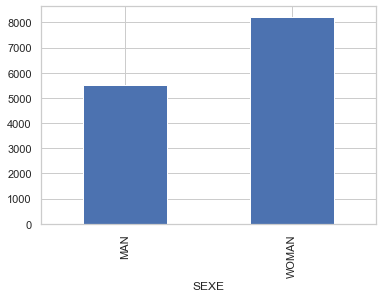

In [37]:
# GENDER
survey_65.groupby(['SEXE']).size().plot.bar()

In [38]:
display(pd.crosstab(data.SEXE, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SEXE,,
MAN,4099,1363
WOMAN,6399,1756


In [39]:
data_prep = {'WOMAN': 1,
            'MAN': 0}
data['Gender'] = [data_prep[i] for i in data['SEXE']]

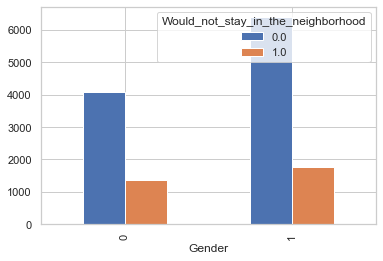

In [40]:
table = pd.crosstab(data.Gender, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

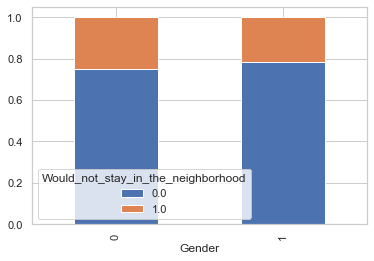

In [41]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

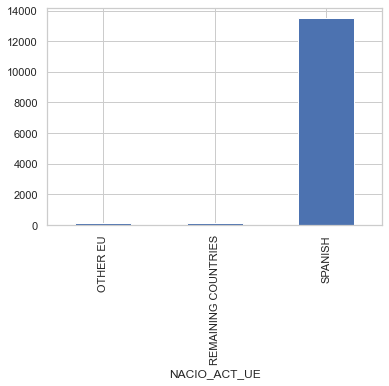

In [42]:
# NATIONALITY
survey_65.groupby(['NACIO_ACT_UE']).size().plot.bar()

In [43]:
display(pd.crosstab(data.NACIO_ACT_UE, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,88,15
REMAINING COUNTRIES,88,32
SPANISH,10322,3072


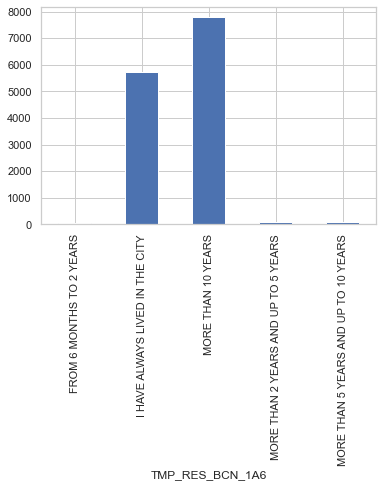

In [44]:
# HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
survey_65.groupby(['TMP_RES_BCN_1A6']).size().plot.bar()

In [45]:
display(pd.crosstab(data.TMP_RES_BCN_1A6, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,37,20
I HAVE ALWAYS LIVED IN THE CITY,4402,1281
MORE THAN 10 YEARS,5931,1768
MORE THAN 2 YEARS AND UP TO 5 YEARS,60,23
MORE THAN 5 YEARS AND UP TO 10 YEARS,68,27


In [46]:
data.TMP_RES_BCN_1A6.unique()

array(['MORE THAN 10 YEARS', 'I HAVE ALWAYS LIVED IN THE CITY',
       'MORE THAN 5 YEARS AND UP TO 10 YEARS',
       'MORE THAN 2 YEARS AND UP TO 5 YEARS', 'FROM 6 MONTHS TO 2 YEARS'],
      dtype=object)

In [47]:
data_prep = {'I HAVE ALWAYS LIVED IN THE CITY': 'I HAVE ALWAYS LIVED IN THE CITY',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS'}
data['Time_living_in_BCN'] = [data_prep[i] for i in data['TMP_RES_BCN_1A6']]

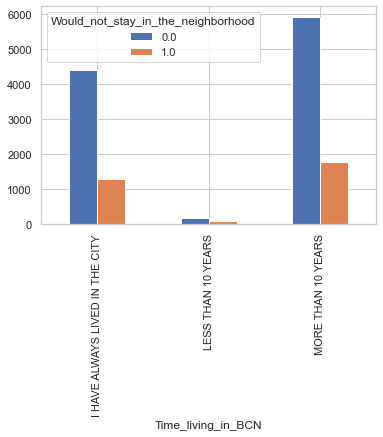

In [48]:
table = pd.crosstab(data.Time_living_in_BCN, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

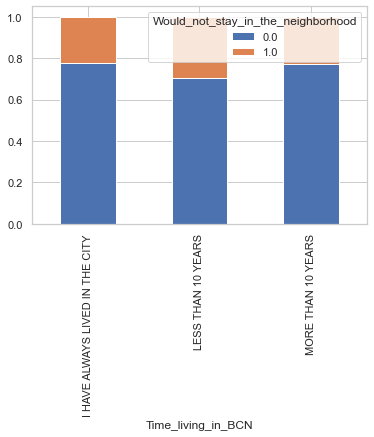

In [49]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

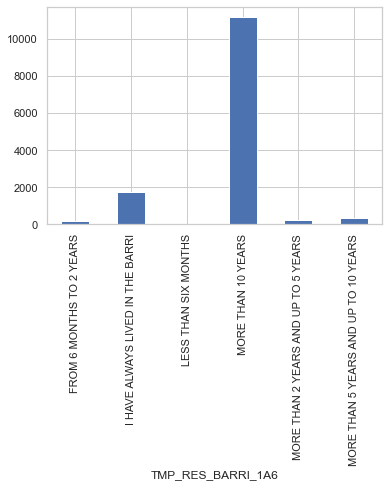

In [50]:
# HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
survey_65.groupby(['TMP_RES_BARRI_1A6']).size().plot.bar()

In [51]:
display(pd.crosstab(data.TMP_RES_BARRI_1A6, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,118,58
I HAVE ALWAYS LIVED IN THE BARRI,1449,296
LESS THAN SIX MONTHS,33,16
MORE THAN 10 YEARS,8525,2547
MORE THAN 2 YEARS AND UP TO 5 YEARS,143,89
MORE THAN 5 YEARS AND UP TO 10 YEARS,230,113


In [52]:
data.TMP_RES_BARRI_1A6.unique()

array(['MORE THAN 10 YEARS', 'MORE THAN 5 YEARS AND UP TO 10 YEARS',
       'I HAVE ALWAYS LIVED IN THE BARRI', 'FROM 6 MONTHS TO 2 YEARS',
       'MORE THAN 2 YEARS AND UP TO 5 YEARS', 'LESS THAN SIX MONTHS'],
      dtype=object)

In [53]:
data_prep = {'I HAVE ALWAYS LIVED IN THE BARRI': 'I HAVE ALWAYS LIVED IN THE CITY',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS',
             'LESS THAN SIX MONTHS': 'LESS THAN 10 YEARS'}
data['Time_living_in_barri'] = [data_prep[i] for i in data['TMP_RES_BARRI_1A6']]

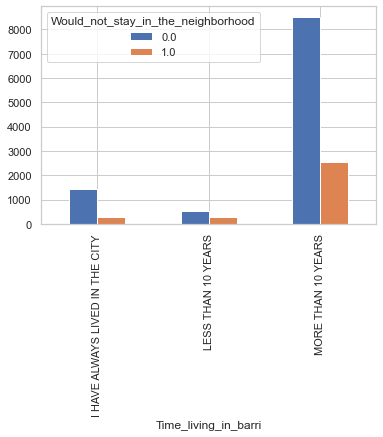

In [54]:
table = pd.crosstab(data.Time_living_in_barri, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

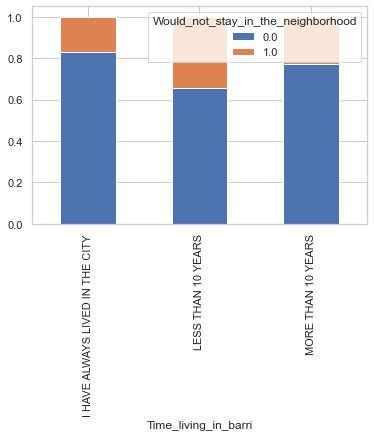

In [55]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

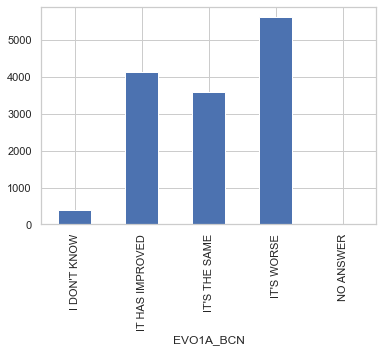

In [56]:
# DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
survey_65.groupby(['EVO1A_BCN']).size().plot.bar()

In [57]:
display(pd.crosstab(data.EVO1A_BCN, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,288,82
IT HAS IMPROVED,3355,731
IT'S THE SAME,2858,715
IT'S WORSE,3992,1585
NO ANSWER,5,6


In [58]:
data.EVO1A_BCN.unique()

array(["IT'S WORSE", "IT'S THE SAME", 'IT HAS IMPROVED', "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [59]:
data_prep = {"IT'S WORSE": -1, 
             "IT'S THE SAME": 0, 
             'IT HAS IMPROVED': 1, 
             "I DON'T KNOW": 0,
             'NO ANSWER': 0}
data['BCN_if_has_improved'] = [data_prep[i] for i in data['EVO1A_BCN']]

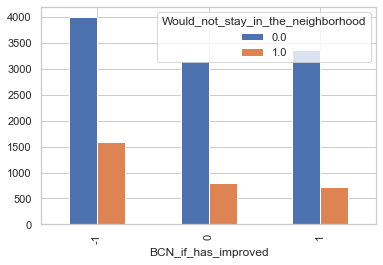

In [60]:
table = pd.crosstab(data.BCN_if_has_improved, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

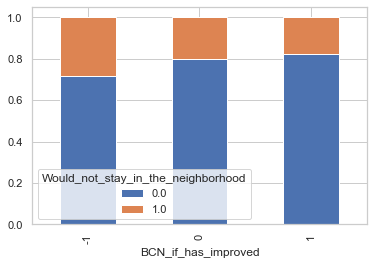

In [61]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

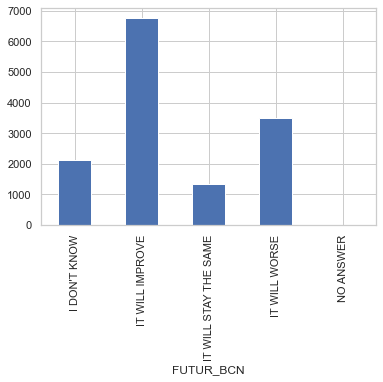

In [62]:
# FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
survey_65.groupby(['FUTUR_BCN']).size().plot.bar()

In [63]:
display(pd.crosstab(data.FUTUR_BCN, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1609,464
IT WILL IMPROVE,5385,1331
IT WILL STAY THE SAME,1024,310
IT WILL WORSE,2471,1008
NO ANSWER,9,6


In [64]:
data.FUTUR_BCN.unique()

array(['IT WILL WORSE', 'IT WILL IMPROVE', 'IT WILL STAY THE SAME',
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [65]:
data_prep = {'IT WILL WORSE': -1, 
             'IT WILL IMPROVE': 1, 
             'IT WILL STAY THE SAME': 0,
             "I DON'T KNOW": 0, 
             'NO ANSWER': 0}
data['BCN_if_will_improve'] = [data_prep[i] for i in data['FUTUR_BCN']]

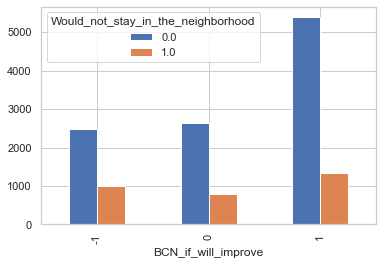

In [66]:
table = pd.crosstab(data.BCN_if_will_improve, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

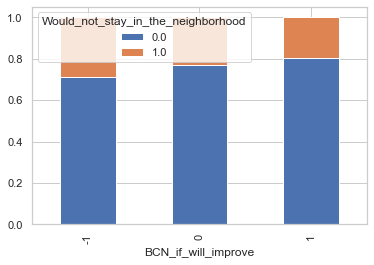

In [67]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

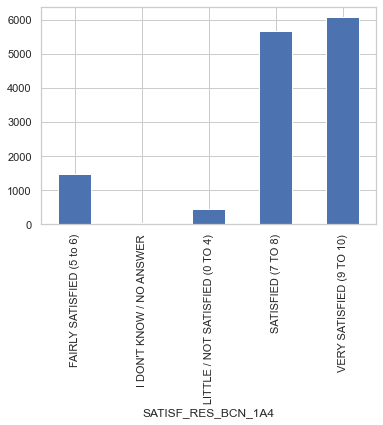

In [68]:
# ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED
survey_65.groupby(['SATISF_RES_BCN_1A4']).size().plot.bar()

In [69]:
display(pd.crosstab(data.SATISF_RES_BCN_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_1A4,,
FAIRLY SATISFIED (5 to 6),883,569
I DON'T KNOW / NO ANSWER,42,13
LITTLE / NOT SATISFIED (0 TO 4),190,255
SATISFIED (7 TO 8),4328,1306
VERY SATISFIED (9 TO 10),5055,976


In [70]:
data.SATISF_RES_BCN_1A4.unique()

array(['SATISFIED (7 TO 8)', 'VERY SATISFIED (9 TO 10)',
       'FAIRLY SATISFIED (5 to 6)', 'LITTLE / NOT SATISFIED (0 TO 4)',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [71]:
data_prep = {'SATISFIED (7 TO 8)': 3, 
             'VERY SATISFIED (9 TO 10)': 4,
             'FAIRLY SATISFIED (5 to 6)': 2, 
             'LITTLE / NOT SATISFIED (0 TO 4)': 1,
             "I DON'T KNOW / NO ANSWER": 0}
data['BCN_satisfaction_of_living'] = [data_prep[i] for i in data['SATISF_RES_BCN_1A4']]

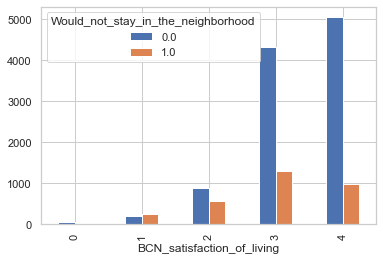

In [72]:
table = pd.crosstab(data.BCN_satisfaction_of_living, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

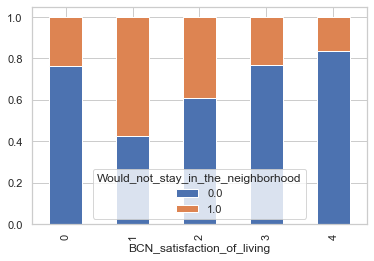

In [73]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

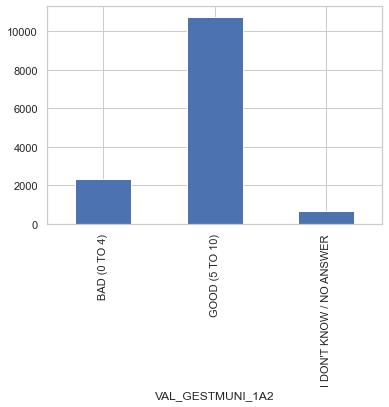

In [74]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED
survey_65.groupby(['VAL_GESTMUNI_1A2']).size().plot.bar()

In [75]:
display(pd.crosstab(data.VAL_GESTMUNI_1A2, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTMUNI_1A2,,
BAD (0 TO 4),1584,733
GOOD (5 TO 10),8413,2255
I DON'T KNOW / NO ANSWER,501,131


In [76]:
data.VAL_GESTMUNI_1A2.unique()

array(['GOOD (5 TO 10)', 'BAD (0 TO 4)', "I DON'T KNOW / NO ANSWER"],
      dtype=object)

In [77]:
data_prep = {'GOOD (5 TO 10)': 1, 
             'BAD (0 TO 4)': -1,
             "I DON'T KNOW / NO ANSWER": 0}
data['BCN_city_management'] = [data_prep[i] for i in data['VAL_GESTMUNI_1A2']]

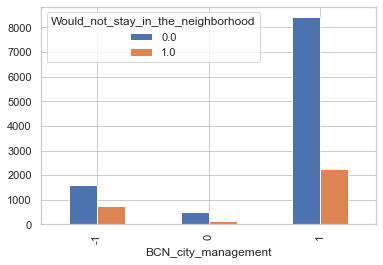

In [78]:
table = pd.crosstab(data.BCN_city_management, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

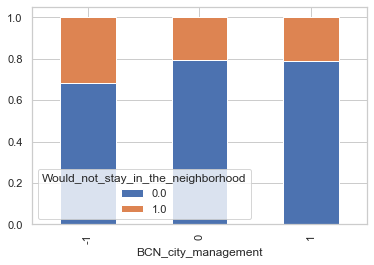

In [79]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [80]:
survey_65.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_SOROLL_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_GUB_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_1A2',
 'VAL_CSS_1A2',
 'VAL_CULT_1A2',
 'VAL_FESTESPOP_1A2',
 'VAL_MERCAT_1A2',
 'VAL_BIBLIO_1A2',
 'EVO1A_ESCOMBRARIES',
 'EVO1A_NETEJA',
 'EVO1A_SOROLL',
 'EVO1A_VERD',
 'EVO1A_ENLLUM',
 'EVO1A_URBA',
 'EVO1A_ASFALT',
 'EVO1A_FACANES',
 'EVO1A_CIRCUL',
 'EVO1A_APARCA',
 'EVO1A_GUB',
 'EVO1A_SEGUR',
 'EVO1A_SEGUR_BARRI',
 'EVO1A_ESPORT',
 'EVO1A_SIAC',
 'EVO1A_CSS',
 'EVO1A_CULT',
 'EVO1A_FESTESPOP',
 'EVO1A_MERCAT',
 'EVO1A_BIBLIO',
 'US_VERD',
 'US_BUS',
 'US_METRO',
 'US_ESPORT',
 'US_SIAC',
 'US_CS

In [81]:
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_SOROLL_1A2', 'VAL_VERD_1A2',
          'VAL_ENLLUM_1A2', 'VAL_URBA_1A2', 'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_APARCA_1A2',
          'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_ESPORT_1A2', 'VAL_SIAC_1A2', 'VAL_CSS_1A2',
          'VAL_CULT_1A2', 'VAL_FESTESPOP_1A2', 'VAL_MERCAT_1A2', 'VAL_BIBLIO_1A2']:
    display(pd.crosstab(data[x], data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES_1A2,,
BAD (0 TO 4),504,258
GOOD (5 TO 10),9954,2848
I DON'T KNOW / NO ANSWER,40,13


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA_1A2,,
BAD (0 TO 4),1568,716
GOOD (5 TO 10),8903,2398
I DON'T KNOW / NO ANSWER,27,5


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SOROLL_1A2,,
BAD (0 TO 4),2940,1297
GOOD (5 TO 10),7223,1751
I DON'T KNOW / NO ANSWER,335,71


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD_1A2,,
BAD (0 TO 4),1591,743
GOOD (5 TO 10),8396,2273
I DON'T KNOW / NO ANSWER,511,103


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM_1A2,,
BAD (0 TO 4),882,374
GOOD (5 TO 10),9430,2691
I DON'T KNOW / NO ANSWER,186,54


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA_1A2,,
BAD (0 TO 4),1064,544
GOOD (5 TO 10),8176,2209
I DON'T KNOW / NO ANSWER,1258,366


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT_1A2,,
BAD (0 TO 4),2122,912
GOOD (5 TO 10),8246,2169
I DON'T KNOW / NO ANSWER,130,38


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES_1A2,,
BAD (0 TO 4),1076,511
GOOD (5 TO 10),8748,2441
I DON'T KNOW / NO ANSWER,674,167


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL_1A2,,
BAD (0 TO 4),3066,1142
GOOD (5 TO 10),6873,1836
I DON'T KNOW / NO ANSWER,559,141


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA_1A2,,
BAD (0 TO 4),5709,1948
GOOD (5 TO 10),3150,773
I DON'T KNOW / NO ANSWER,1639,398


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB_1A2,,
BAD (0 TO 4),1722,778
GOOD (5 TO 10),7494,1996
I DON'T KNOW / NO ANSWER,1282,345


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_1A2,,
BAD (0 TO 4),3167,1239
GOOD (5 TO 10),6799,1729
I DON'T KNOW / NO ANSWER,532,151


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI_1A2,,
BAD (0 TO 4),2505,1207
GOOD (5 TO 10),7862,1866
I DON'T KNOW / NO ANSWER,131,46


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT_1A2,,
BAD (0 TO 4),834,463
GOOD (5 TO 10),5379,1574
I DON'T KNOW / NO ANSWER,4285,1082


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC_1A2,,
BAD (0 TO 4),555,282
GOOD (5 TO 10),6946,2028
I DON'T KNOW / NO ANSWER,2997,809


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS_1A2,,
BAD (0 TO 4),712,359
GOOD (5 TO 10),5350,1458
I DON'T KNOW / NO ANSWER,4436,1302


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT_1A2,,
BAD (0 TO 4),350,200
GOOD (5 TO 10),6915,1922
I DON'T KNOW / NO ANSWER,3233,997


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP_1A2,,
BAD (0 TO 4),624,335
GOOD (5 TO 10),7482,1998
I DON'T KNOW / NO ANSWER,2392,786


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT_1A2,,
BAD (0 TO 4),628,289
GOOD (5 TO 10),8813,2561
I DON'T KNOW / NO ANSWER,1057,269


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO_1A2,,
BAD (0 TO 4),164,70
GOOD (5 TO 10),6340,1967
I DON'T KNOW / NO ANSWER,3994,1082


In [82]:
data_prep = {'GOOD (5 TO 10)': 1, 
             'BAD (0 TO 4)': -1,
            "I DON'T KNOW / NO ANSWER": 0}
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_SOROLL_1A2', 'VAL_VERD_1A2',
          'VAL_ENLLUM_1A2', 'VAL_URBA_1A2', 'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_APARCA_1A2',
          'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_ESPORT_1A2', 'VAL_SIAC_1A2', 'VAL_CSS_1A2',
          'VAL_CULT_1A2', 'VAL_FESTESPOP_1A2', 'VAL_MERCAT_1A2', 'VAL_BIBLIO_1A2']:
    data[questions_dict[x][22:][:-10]] = [data_prep[i] for i in data[x]]

C:\Users\THINK\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


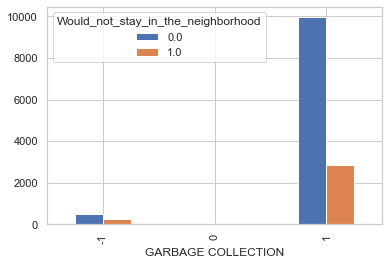

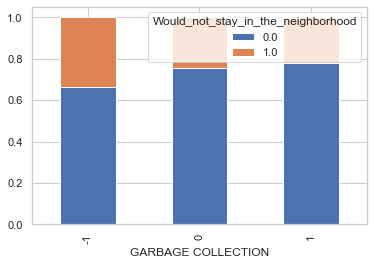

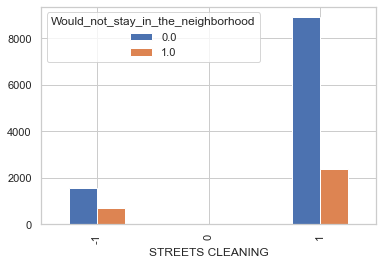

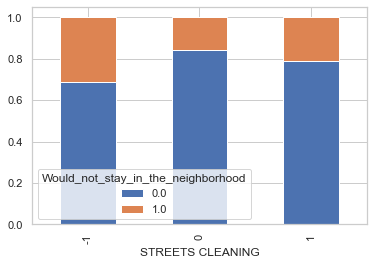

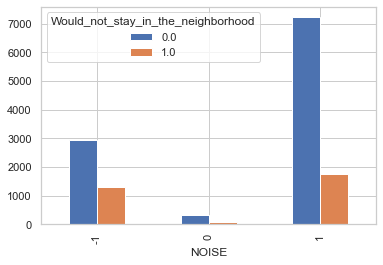

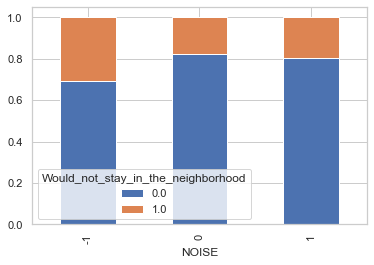

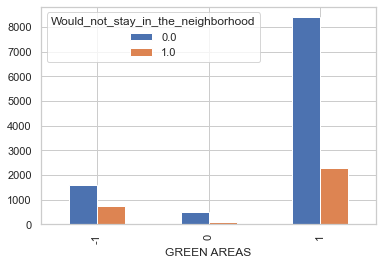

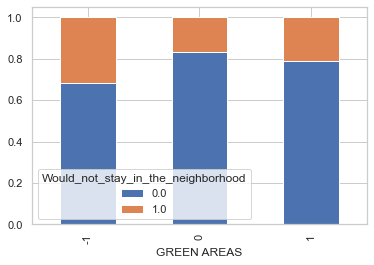

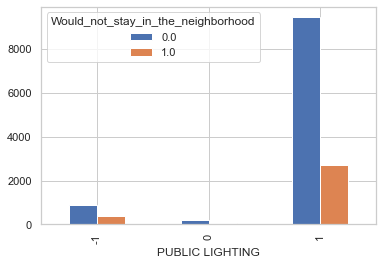

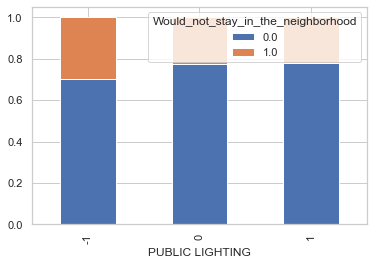

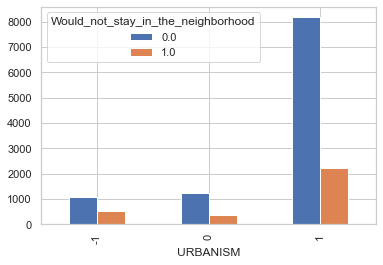

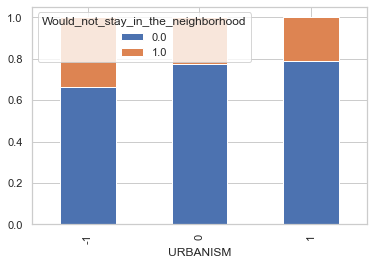

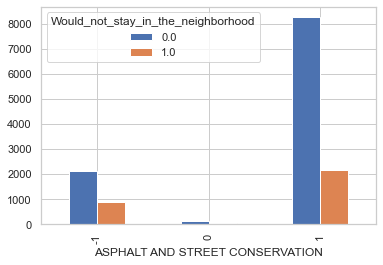

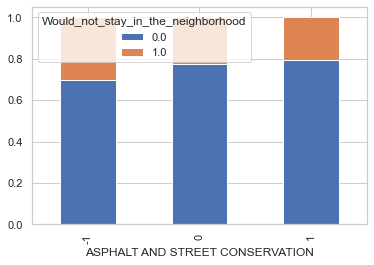

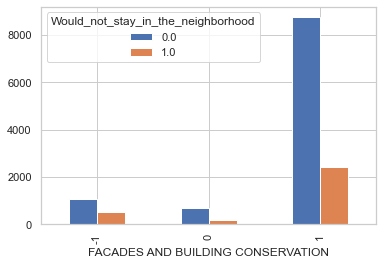

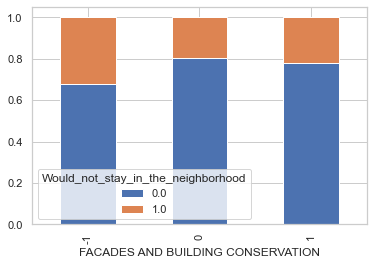

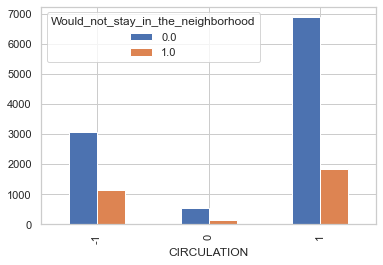

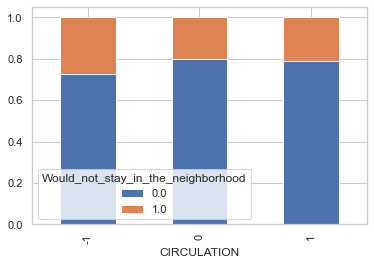

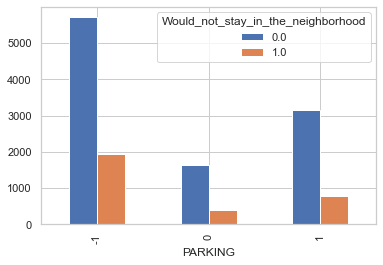

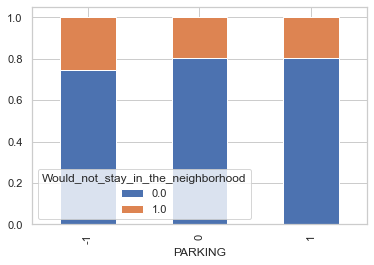

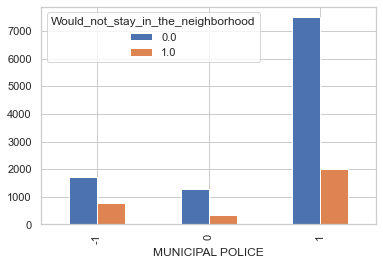

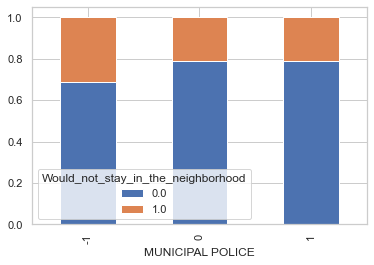

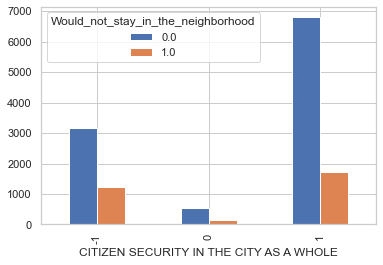

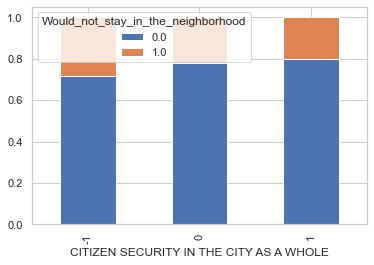

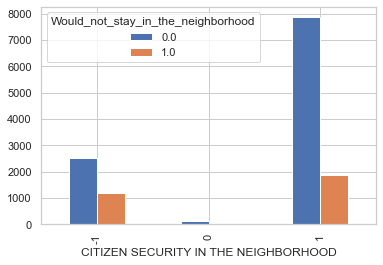

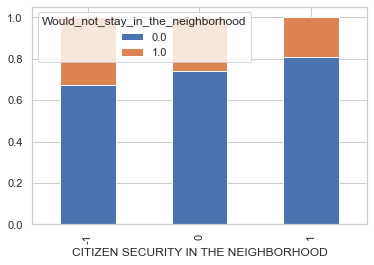

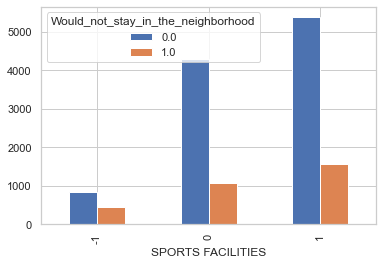

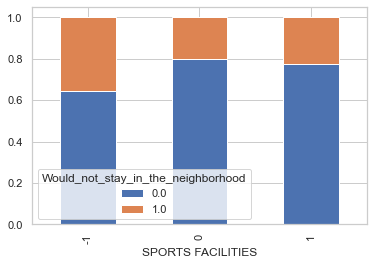

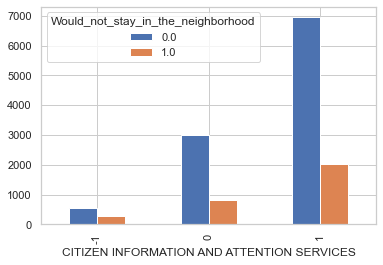

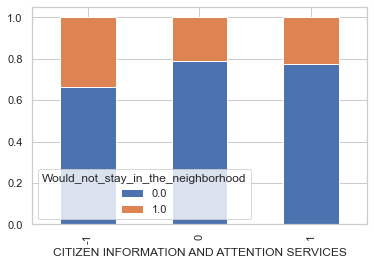

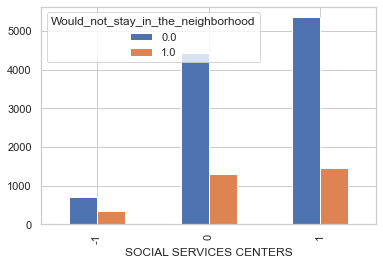

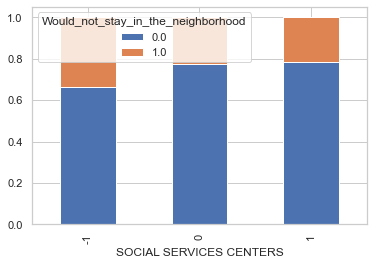

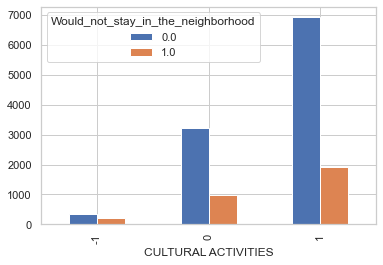

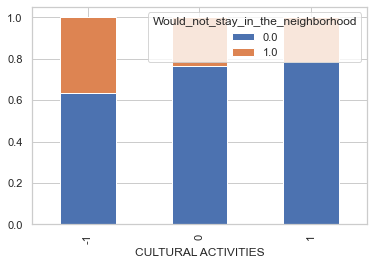

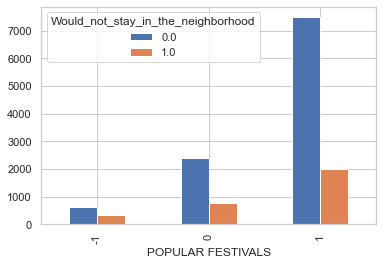

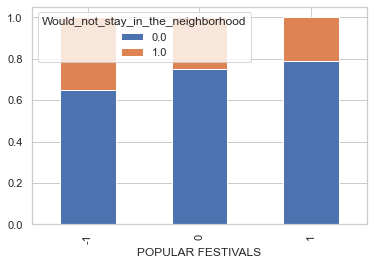

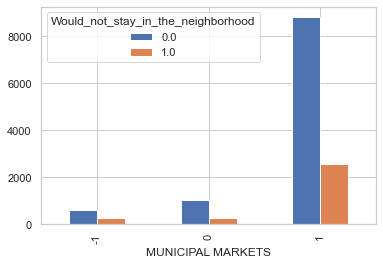

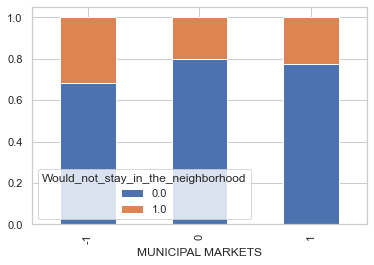

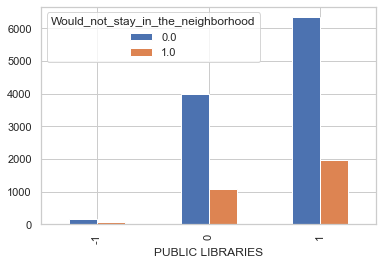

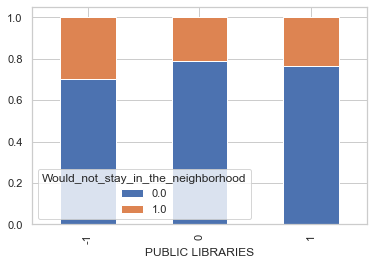

In [83]:
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_SOROLL_1A2', 'VAL_VERD_1A2',
          'VAL_ENLLUM_1A2', 'VAL_URBA_1A2', 'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_APARCA_1A2',
          'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_ESPORT_1A2', 'VAL_SIAC_1A2', 'VAL_CSS_1A2',
          'VAL_CULT_1A2', 'VAL_FESTESPOP_1A2', 'VAL_MERCAT_1A2', 'VAL_BIBLIO_1A2']:
    table = pd.crosstab(data[questions_dict[x][22:][:-10]], data.Would_not_stay_in_the_neighborhood)
    table.plot(kind='bar')
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

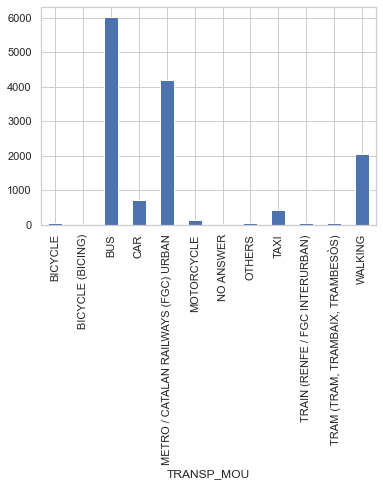

In [84]:
# WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?
survey_65.groupby(['TRANSP_MOU']).size().plot.bar()

In [85]:
display(pd.crosstab(data.TRANSP_MOU, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,31,10
BICYCLE (BICING),10,5
BUS,4586,1381
CAR,534,170
METRO / CATALAN RAILWAYS (FGC) URBAN,3170,996
MOTORCYCLE,91,42
NO ANSWER,1,1
OTHERS,29,10
TAXI,376,57


In [86]:
data.TRANSP_MOU.unique()

array(['BUS', 'METRO / CATALAN RAILWAYS (FGC) URBAN', 'CAR', 'TAXI',
       'WALKING', 'MOTORCYCLE', 'OTHERS', 'BICYCLE (BICING)',
       'TRAIN (RENFE / FGC INTERURBAN)',
       'TRAM (TRAM, TRAMBAIX, TRAMBESÒS)', 'BICYCLE', 'NO ANSWER'],
      dtype=object)

In [87]:
data_prep = {'BUS': 'PUBLIC TRANSPORT', 
             'METRO / CATALAN RAILWAYS (FGC) URBAN': 'PUBLIC TRANSPORT', 
             'CAR': 'CAR', 
             'TAXI': 'TAXI',
             'WALKING': 'WALKING', 
             'MOTORCYCLE': 'MOTORCYCLE', 
             'OTHERS': 'OTHERS', 
             'BICYCLE (BICING)': 'BICYCLE',
             'TRAIN (RENFE / FGC INTERURBAN)': 'PUBLIC TRANSPORT',
             'TRAM (TRAM, TRAMBAIX, TRAMBESÒS)': 'PUBLIC TRANSPORT', 
             'BICYCLE': 'BICYCLE', 
             'NO ANSWER': np.nan}
data['Means_of_transport'] = [data_prep[i] for i in data['TRANSP_MOU']]

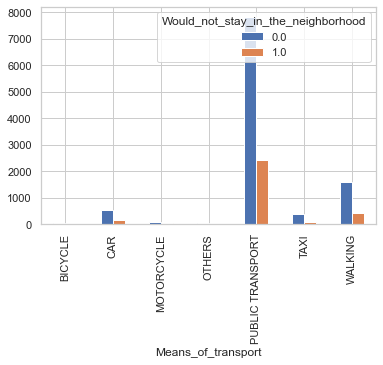

In [88]:
table = pd.crosstab(data.Means_of_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

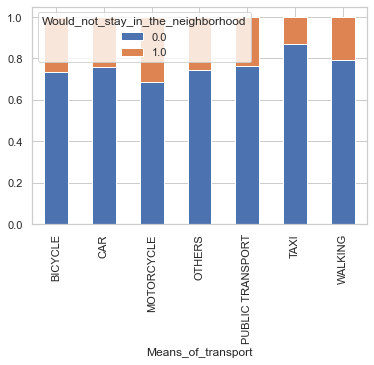

In [89]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

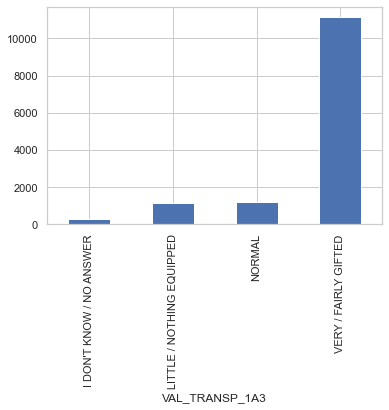

In [90]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
survey_65.groupby(['VAL_TRANSP_1A3']).size().plot.bar()

In [91]:
display(pd.crosstab(data.VAL_TRANSP_1A3, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_1A3,,
I DON'T KNOW / NO ANSWER,208,64
LITTLE / NOTHING EQUIPPED,779,350
NORMAL,866,299
VERY / FAIRLY GIFTED,8645,2406


In [92]:
data.VAL_TRANSP_1A3.unique()

array(['VERY / FAIRLY GIFTED', 'NORMAL', 'LITTLE / NOTHING EQUIPPED',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [93]:
data_prep = {'VERY / FAIRLY GIFTED': 1, 
             'NORMAL': 0, 
             'LITTLE / NOTHING EQUIPPED': -1,
             "I DON'T KNOW / NO ANSWER": 0}
data['BCN_transport'] = [data_prep[i] for i in data['VAL_TRANSP_1A3']]

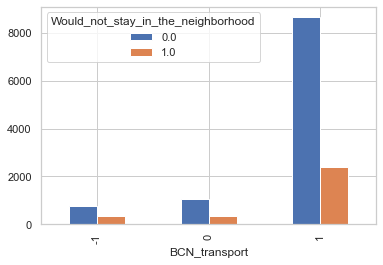

In [94]:
table = pd.crosstab(data.BCN_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

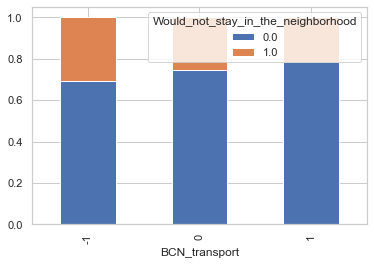

In [95]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

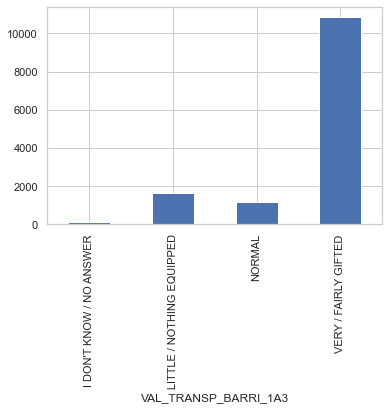

In [96]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
survey_65.groupby(['VAL_TRANSP_BARRI_1A3']).size().plot.bar()

In [97]:
display(pd.crosstab(data.VAL_TRANSP_BARRI_1A3, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A3,,
I DON'T KNOW / NO ANSWER,70,21
LITTLE / NOTHING EQUIPPED,1162,475
NORMAL,809,316
VERY / FAIRLY GIFTED,8457,2307


In [98]:
data.VAL_TRANSP_BARRI_1A3.unique()

array(['VERY / FAIRLY GIFTED', 'NORMAL', "I DON'T KNOW / NO ANSWER",
       'LITTLE / NOTHING EQUIPPED'], dtype=object)

In [99]:
data_prep = {'VERY / FAIRLY GIFTED': 1, 
             'NORMAL': 0, 
             'LITTLE / NOTHING EQUIPPED': -1,
             "I DON'T KNOW / NO ANSWER": 0}
data['Barri_transport'] = [data_prep[i] for i in data['VAL_TRANSP_BARRI_1A3']]

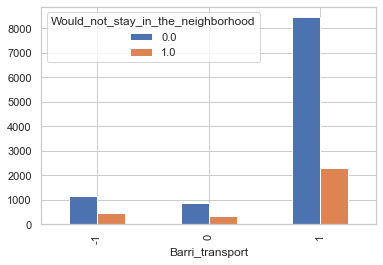

In [100]:
table = pd.crosstab(data.Barri_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

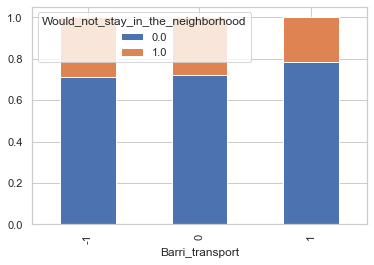

In [101]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

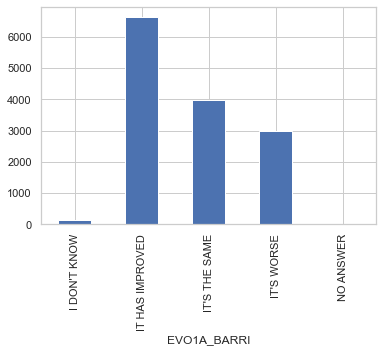

In [102]:
# IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
survey_65.groupby(['EVO1A_BARRI']).size().plot.bar()

In [103]:
display(pd.crosstab(data.EVO1A_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,86,40
IT HAS IMPROVED,5384,1192
IT'S THE SAME,3135,806
IT'S WORSE,1891,1081
NO ANSWER,2,0


In [104]:
data.EVO1A_BARRI.unique()

array(["IT'S WORSE", "IT'S THE SAME", 'IT HAS IMPROVED', "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [105]:
data_prep = {"IT'S WORSE": -1, 
             "IT'S THE SAME": 0, 
             'IT HAS IMPROVED': 1, 
             "I DON'T KNOW": 0,
             'NO ANSWER': 0}
data['Barri_if_has_improved'] = [data_prep[i] for i in data['EVO1A_BARRI']]

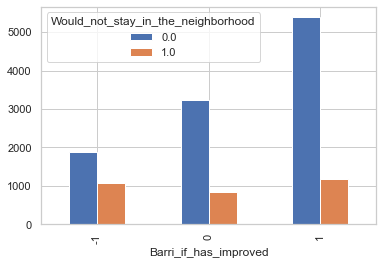

In [106]:
table = pd.crosstab(data.Barri_if_has_improved, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

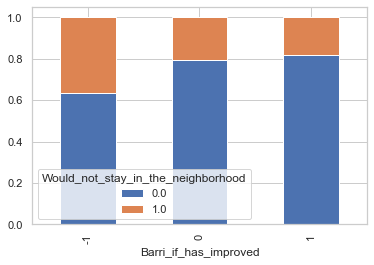

In [107]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

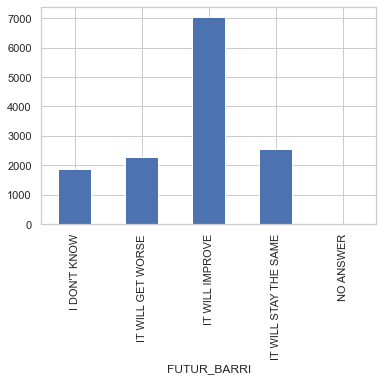

In [108]:
# AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
survey_65.groupby(['FUTUR_BARRI']).size().plot.bar()

In [109]:
display(pd.crosstab(data.FUTUR_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1392,454
IT WILL GET WORSE,1395,861
IT WILL IMPROVE,5720,1275
IT WILL STAY THE SAME,1988,529
NO ANSWER,3,0


In [110]:
data.FUTUR_BARRI.unique()

array(['IT WILL GET WORSE', 'IT WILL STAY THE SAME', 'IT WILL IMPROVE',
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [111]:
data_prep = {'IT WILL GET WORSE': -1, 
             'IT WILL IMPROVE': 1, 
             'IT WILL STAY THE SAME': 0,
             "I DON'T KNOW": 0, 
             'NO ANSWER': 0}
data['Barri_if_will_improve'] = [data_prep[i] for i in data['FUTUR_BARRI']]

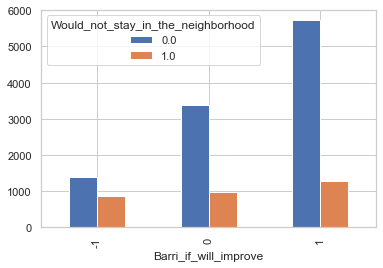

In [112]:
table = pd.crosstab(data.Barri_if_will_improve, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

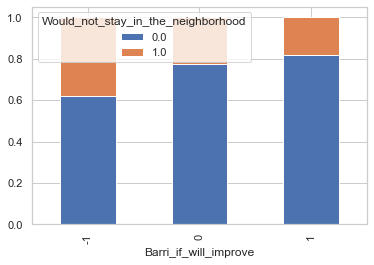

In [113]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

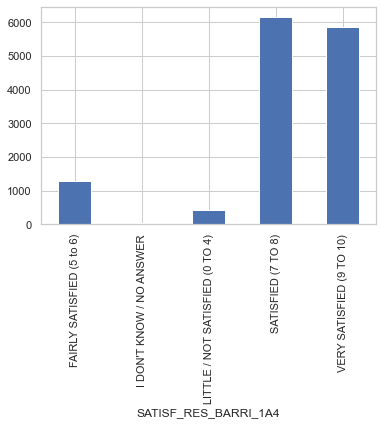

In [114]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
survey_65.groupby(['SATISF_RES_BARRI_1A4']).size().plot.bar()

In [115]:
display(pd.crosstab(data.SATISF_RES_BARRI_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_1A4,,
FAIRLY SATISFIED (5 to 6),616,637
I DON'T KNOW / NO ANSWER,26,15
LITTLE / NOT SATISFIED (0 TO 4),87,331
SATISFIED (7 TO 8),4652,1438
VERY SATISFIED (9 TO 10),5117,698


In [116]:
data.SATISF_RES_BARRI_1A4.unique()

array(['FAIRLY SATISFIED (5 to 6)', 'VERY SATISFIED (9 TO 10)',
       'SATISFIED (7 TO 8)', 'LITTLE / NOT SATISFIED (0 TO 4)',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [117]:
data_prep = {'SATISFIED (7 TO 8)': 3, 
             'VERY SATISFIED (9 TO 10)': 4,
             'FAIRLY SATISFIED (5 to 6)': 2, 
             'LITTLE / NOT SATISFIED (0 TO 4)': 1,
             "I DON'T KNOW / NO ANSWER": 0}
data['Barri_satisfaction_of_living'] = [data_prep[i] for i in data['SATISF_RES_BARRI_1A4']]

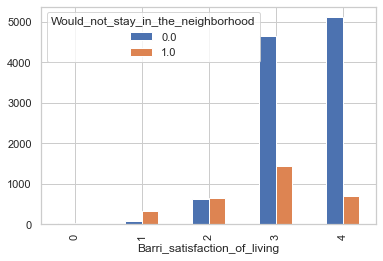

In [118]:
table = pd.crosstab(data.Barri_satisfaction_of_living, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

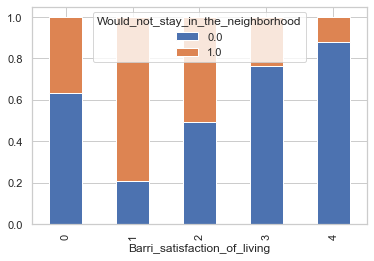

In [119]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

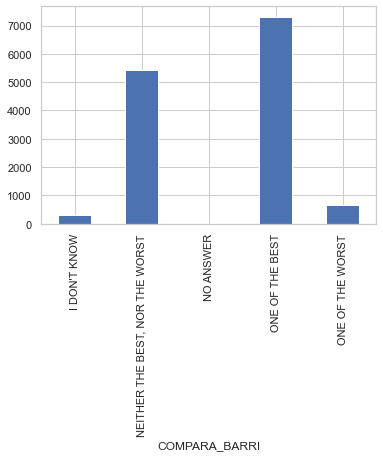

In [120]:
# DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
survey_65.groupby(['COMPARA_BARRI']).size().plot.bar()

In [121]:
display(pd.crosstab(data.COMPARA_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,225,85
"NEITHER THE BEST, NOR THE WORST",3673,1698
NO ANSWER,4,4
ONE OF THE BEST,6357,917
ONE OF THE WORST,239,415


In [122]:
data.COMPARA_BARRI.unique()

array(['NEITHER THE BEST, NOR THE WORST', 'ONE OF THE BEST',
       'ONE OF THE WORST', "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [123]:
data_prep = {'NEITHER THE BEST, NOR THE WORST': 0, 
             'ONE OF THE BEST': 1,
             'ONE OF THE WORST': -1, 
             "I DON'T KNOW": 0, 
             'NO ANSWER': 0}
data['Barri_comparison'] = [data_prep[i] for i in data['COMPARA_BARRI']]

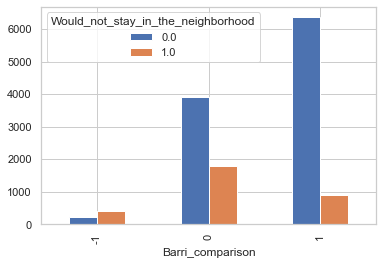

In [124]:
table = pd.crosstab(data.Barri_comparison, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

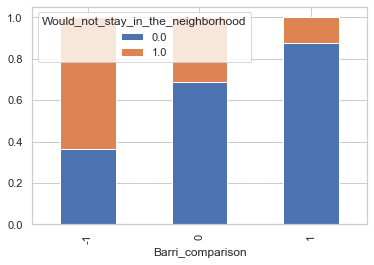

In [125]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

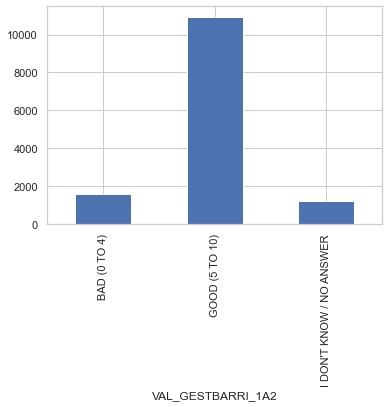

In [126]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD? - GROUPED
survey_65.groupby(['VAL_GESTBARRI_1A2']).size().plot.bar()

In [127]:
display(pd.crosstab(data.VAL_GESTBARRI_1A2, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTBARRI_1A2,,
BAD (0 TO 4),926,633
GOOD (5 TO 10),8670,2183
I DON'T KNOW / NO ANSWER,902,303


In [128]:
data.VAL_GESTBARRI_1A2.unique()

array(['GOOD (5 TO 10)', "I DON'T KNOW / NO ANSWER", 'BAD (0 TO 4)'],
      dtype=object)

In [129]:
data_prep = {'GOOD (5 TO 10)': 1, 
             'BAD (0 TO 4)': -1,
             "I DON'T KNOW / NO ANSWER": 0}
data['Barri_city_management'] = [data_prep[i] for i in data['VAL_GESTBARRI_1A2']]

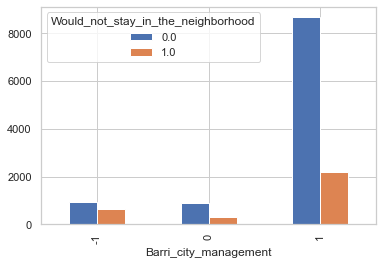

In [130]:
table = pd.crosstab(data.Barri_city_management, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

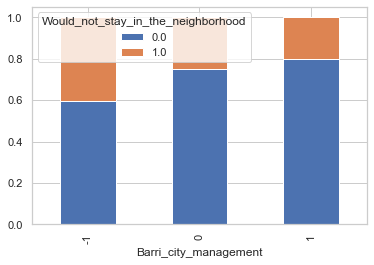

In [131]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

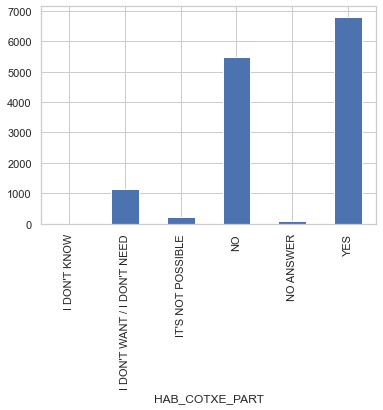

In [132]:
# DO YOU HAVE: PRIVATE CAR
survey_65.groupby(['HAB_COTXE_PART']).size().plot.bar()

In [133]:
display(pd.crosstab(data.HAB_COTXE_PART, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,2,2
I DON'T WANT / I DON'T NEED,848,269
IT'S NOT POSSIBLE,151,68
NO,4352,1083
NO ANSWER,72,19
YES,5073,1678


In [134]:
data.HAB_COTXE_PART.unique()

array(['NO', 'YES', 'NO ANSWER', "I DON'T KNOW",
       "I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE"], dtype=object)

In [135]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': 0, 
             "I DON'T KNOW": 0,
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0}
data['Owns_a_car'] = [data_prep[i] for i in data['HAB_COTXE_PART']]

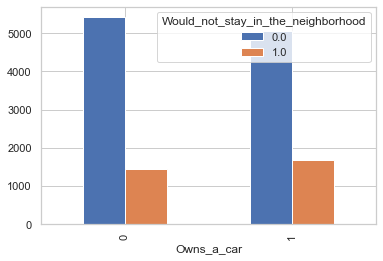

In [136]:
table = pd.crosstab(data.Owns_a_car, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

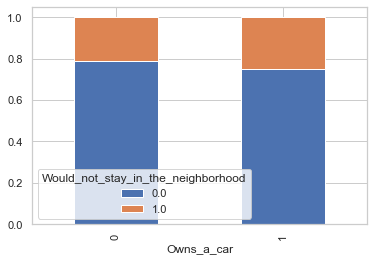

In [137]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

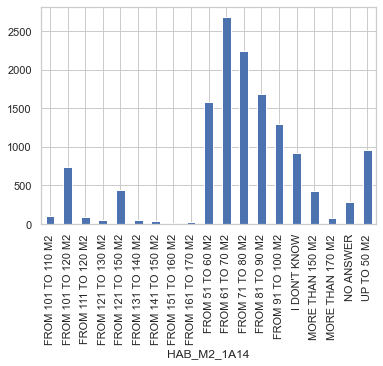

In [138]:
# HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
survey_65.groupby(['HAB_M2_1A14']).size().plot.bar()

In [139]:
display(pd.crosstab(data.HAB_M2_1A14, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,27
FROM 101 TO 120 M2,616,121
FROM 111 TO 120 M2,70,25
FROM 121 TO 130 M2,42,15
FROM 121 TO 150 M2,376,68
FROM 131 TO 140 M2,38,11
FROM 141 TO 150 M2,28,9
FROM 151 TO 160 M2,14,2
FROM 161 TO 170 M2,18,5


In [140]:
data.HAB_M2_1A14.unique()

array(['FROM 61 TO 70 M2', 'FROM 51 TO 60 M2', 'UP TO 50 M2',
       'FROM 81 TO 90 M2', 'FROM 91 TO 100 M2', 'MORE THAN 150 M2',
       'FROM 71 TO 80 M2', 'NO ANSWER', "I DON'T KNOW",
       'FROM 101 TO 120 M2', 'FROM 121 TO 150 M2', 'FROM 101 TO 110 M2',
       'MORE THAN 170 M2', 'FROM 111 TO 120 M2', 'FROM 121 TO 130 M2',
       'FROM 141 TO 150 M2', 'FROM 131 TO 140 M2', 'FROM 161 TO 170 M2',
       'FROM 151 TO 160 M2'], dtype=object)

In [141]:
data_prep = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': '51-100 M2', # inserting most common value
             "I DON'T KNOW": '51-100 M2'} # inserting most common value
data['House_M2'] = [data_prep[i] for i in data['HAB_M2_1A14']]

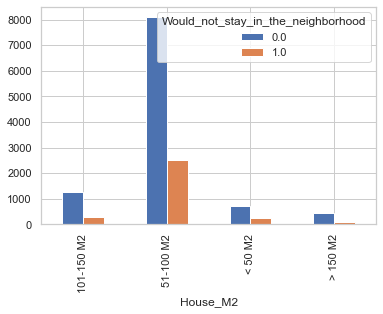

In [142]:
table = pd.crosstab(data.House_M2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

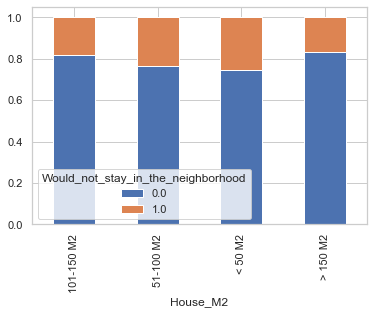

In [143]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

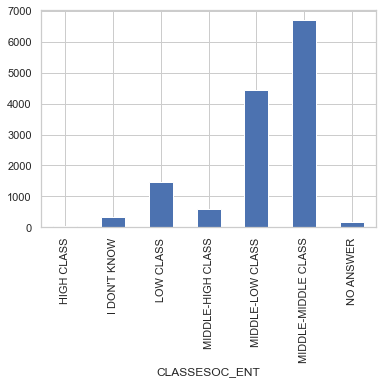

In [144]:
# COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
survey_65.groupby(['CLASSESOC_ENT']).size().plot.bar()

In [145]:
display(pd.crosstab(data.CLASSESOC_ENT, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,41,3
I DON'T KNOW,252,68
LOW CLASS,1042,423
MIDDLE-HIGH CLASS,480,97
MIDDLE-LOW CLASS,3278,1126
MIDDLE-MIDDLE CLASS,5268,1361
NO ANSWER,137,41


In [146]:
data.CLASSESOC_ENT.unique()

array(['MIDDLE-HIGH CLASS', 'MIDDLE-MIDDLE CLASS', 'MIDDLE-LOW CLASS',
       "I DON'T KNOW", 'LOW CLASS', 'NO ANSWER', 'HIGH CLASS'],
      dtype=object)

In [147]:
data_prep = {'MIDDLE-HIGH CLASS': 'MIDDLE-HIGH', 
             'MIDDLE-MIDDLE CLASS': 'MIDDLE-MIDDLE', 
             'MIDDLE-LOW CLASS': 'MIDDLE-LOW',
             "I DON'T KNOW": 'MIDDLE-MIDDLE', # inserting most common value
             'LOW CLASS': 'LOW', 
             'NO ANSWER': 'MIDDLE-MIDDLE', # inserting most common value
             'HIGH CLASS': 'HIGH'} 
data['Social_class'] = [data_prep[i] for i in data['CLASSESOC_ENT']]

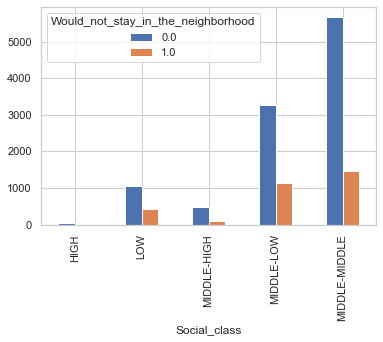

In [148]:
table = pd.crosstab(data.Social_class, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

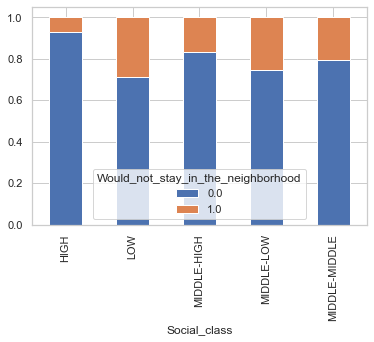

In [149]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

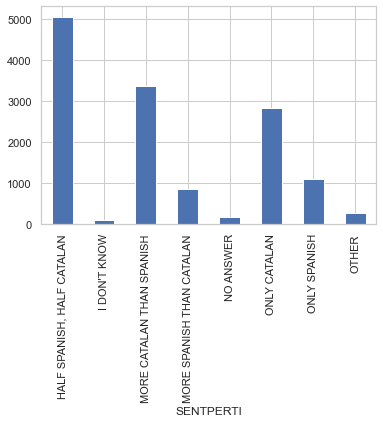

In [150]:
# BELONGING - SPANISH VS CATALAN
survey_65.groupby(['SENTPERTI']).size().plot.bar()

In [151]:
display(pd.crosstab(data.SENTPERTI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",3892,1128
I DON'T KNOW,65,21
MORE CATALAN THAN SPANISH,2633,715
MORE SPANISH THAN CATALAN,604,234
NO ANSWER,126,41
ONLY CATALAN,2202,608
ONLY SPANISH,785,295
OTHER,191,77


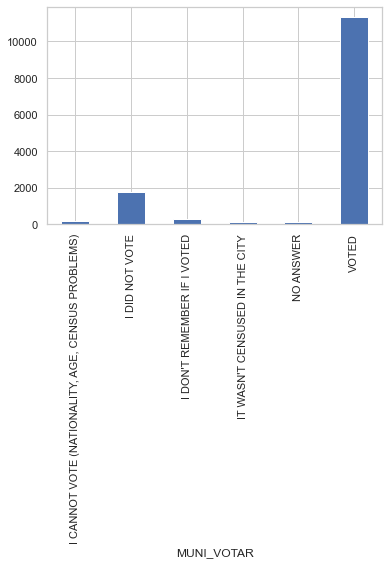

In [152]:
# HAVE YOU VOTED IN THE LAST MUNICIPAL ELECTIONS?
survey_65.groupby(['MUNI_VOTAR']).size().plot.bar()

In [153]:
display(pd.crosstab(data.MUNI_VOTAR, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
MUNI_VOTAR,,
"I CANNOT VOTE (NATIONALITY, AGE, CENSUS PROBLEMS)",130,34
I DID NOT VOTE,1302,432
I DON'T REMEMBER IF I VOTED,199,47
IT WASN'T CENSUSED IN THE CITY,77,39
NO ANSWER,93,19
VOTED,8697,2548


In [154]:
data.MUNI_VOTAR.unique()

array(['VOTED', 'I DID NOT VOTE', 'NO ANSWER',
       'I CANNOT VOTE (NATIONALITY, AGE, CENSUS PROBLEMS)',
       "IT WASN'T CENSUSED IN THE CITY", "I DON'T REMEMBER IF I VOTED"],
      dtype=object)

In [155]:
data_prep = {'VOTED': 1, 
             'I DID NOT VOTE': 0, 
             'NO ANSWER': 0,
             'I CANNOT VOTE (NATIONALITY, AGE, CENSUS PROBLEMS)': 0,
             "IT WASN'T CENSUSED IN THE CITY": 0, 
             "I DON'T REMEMBER IF I VOTED": 0} 
data['Voted'] = [data_prep[i] for i in data['MUNI_VOTAR']]

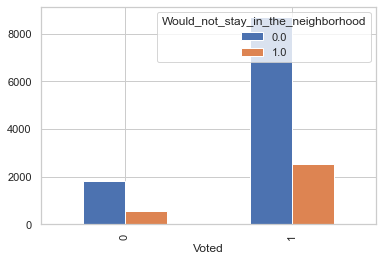

In [156]:
table = pd.crosstab(data.Voted, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

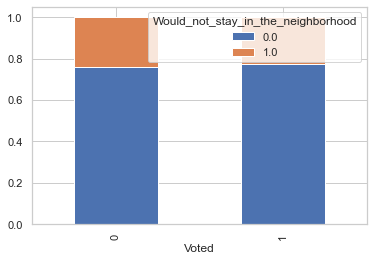

In [157]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

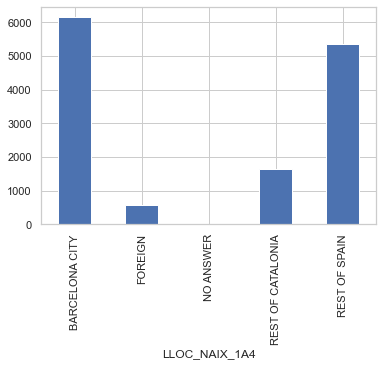

In [158]:
# WHAT IS YOUR PLACE OF BIRTH?
survey_65.groupby(['LLOC_NAIX_1A4']).size().plot.bar()

In [159]:
display(pd.crosstab(data.LLOC_NAIX_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,4710,1395
FOREIGN,449,131
NO ANSWER,9,1
REST OF CATALONIA,1290,342
REST OF SPAIN,4040,1250


In [160]:
data.LLOC_NAIX_1A4.unique()

array(['REST OF SPAIN', 'BARCELONA CITY', 'REST OF CATALONIA', 'FOREIGN',
       'NO ANSWER'], dtype=object)

In [161]:
data_prep = {'REST OF SPAIN': 0, 
             'BARCELONA CITY': 1, 
             'REST OF CATALONIA': 0, 
             'FOREIGN': 0,
             'NO ANSWER': 0} 
data['Born_in_BCN'] = [data_prep[i] for i in data['LLOC_NAIX_1A4']]

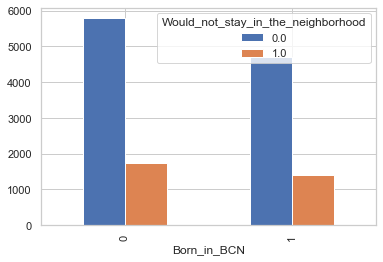

In [162]:
table = pd.crosstab(data.Born_in_BCN, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

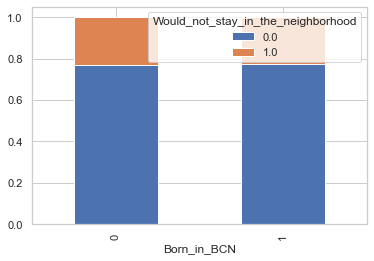

In [163]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

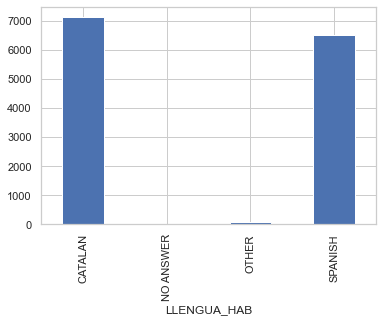

In [164]:
# LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?
survey_65.groupby(['LLENGUA_HAB']).size().plot.bar()

In [165]:
display(pd.crosstab(data.LLENGUA_HAB, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,5578,1490
NO ANSWER,6,2
OTHER,54,27
SPANISH,4860,1600


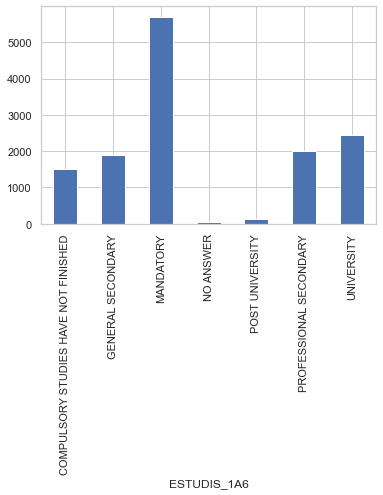

In [166]:
# WHAT IS YOUR LEVEL OF FINISHED STUDIES?
survey_65.groupby(['ESTUDIS_1A6']).size().plot.bar()

In [167]:
display(pd.crosstab(data.ESTUDIS_1A6, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,1152,345
GENERAL SECONDARY,1425,450
MANDATORY,4403,1249
NO ANSWER,39,9
POST UNIVERSITY,96,35
PROFESSIONAL SECONDARY,1521,472
UNIVERSITY,1862,559


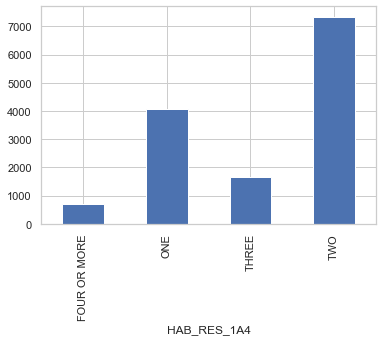

In [168]:
# WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
survey_65.groupby(['HAB_RES_1A4']).size().plot.bar()

In [169]:
display(pd.crosstab(data.HAB_RES_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,508,178
ONE,3172,839
THREE,1226,412
TWO,5592,1690


In [170]:
data.HAB_RES_1A4.unique()

array(['ONE', 'TWO', 'THREE', 'FOUR OR MORE'], dtype=object)

In [171]:
data_prep = {'ONE': 1, 
             'TWO': 0, 
             'THREE': 0, 
             'FOUR OR MORE': 0} 
data['Living_alone'] = [data_prep[i] for i in data['HAB_RES_1A4']]

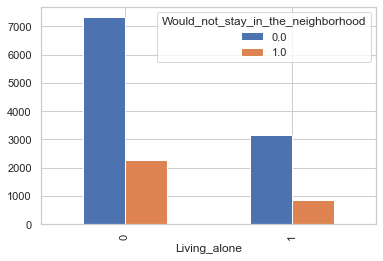

In [172]:
table = pd.crosstab(data.Living_alone, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

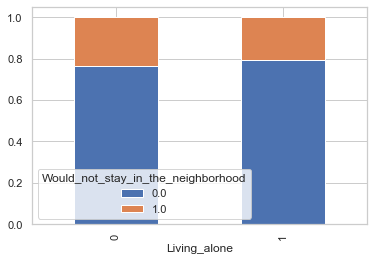

In [173]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## 1.4.3 Feature engineering

In [174]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_SOROLL_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_GUB_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_1A2',
 'VAL_CSS_1A2',
 'VAL_CULT_1A2',
 'VAL_FESTESPOP_1A2',
 'VAL_MERCAT_1A2',
 'VAL_BIBLIO_1A2',
 'EVO1A_ESCOMBRARIES',
 'EVO1A_NETEJA',
 'EVO1A_SOROLL',
 'EVO1A_VERD',
 'EVO1A_ENLLUM',
 'EVO1A_URBA',
 'EVO1A_ASFALT',
 'EVO1A_FACANES',
 'EVO1A_CIRCUL',
 'EVO1A_APARCA',
 'EVO1A_BUS',
 'EVO1A_METRO',
 'EVO1A_GUB',
 'EVO1A_SEGUR',
 'EVO1A_SEGUR_BARRI',
 'EVO1A_ESPORT',
 'EVO1A_SIAC',
 'EVO1A_CSS',
 'EVO1A_CULT',
 'EVO1A_FESTESPOP',
 'EVO1A_MERCAT',
 'EVO1A_BIBLIO',
 'US_

Creating comparable variables - if respondends rate the city higher than the neighbourhood: 
'BCN_if_has_improved' & 'Barri_if_has_improved', 'BCN_if_will_improve' & 'Barri_if_will_improve', 'BCN_satisfaction_of_living' & 'Barri_satisfaction_of_living', 'BCN_city_management' & 'Barri_city_management', 'BCN_transport' & 'Barri_transport'.

In [175]:
for i in [('BCN_if_has_improved', 'Barri_if_has_improved'), 
          ('BCN_if_will_improve', 'Barri_if_will_improve'), 
          ('BCN_satisfaction_of_living', 'Barri_satisfaction_of_living'), 
          ('BCN_city_management', 'Barri_city_management'), 
          ('BCN_transport', 'Barri_transport')]:
    print(i)
    new_column = []
    for j in range(len(data)):
        if data.iloc[j][i[0]] == data.iloc[j][i[1]]:
            new_column.append('Equal')
        elif data.iloc[j][i[0]] > data.iloc[j][i[1]]:
            new_column.append('BCN over Barri')
        elif data.iloc[j][i[0]] < data.iloc[j][i[1]]:
            new_column.append('Barri over BCN')
    data['Compare_'+str(i[0][4:])] = new_column

('BCN_if_has_improved', 'Barri_if_has_improved')
('BCN_if_will_improve', 'Barri_if_will_improve')
('BCN_satisfaction_of_living', 'Barri_satisfaction_of_living')
('BCN_city_management', 'Barri_city_management')
('BCN_transport', 'Barri_transport')


In [176]:
for i in [('BCN_if_has_improved', 'Barri_if_has_improved'), 
          ('BCN_if_will_improve', 'Barri_if_will_improve'), 
          ('BCN_satisfaction_of_living', 'Barri_satisfaction_of_living'), 
          ('BCN_city_management', 'Barri_city_management'), 
          ('BCN_transport', 'Barri_transport')]:
    print(i)
    new_column = []
    for j in range(len(data)):
        if data.iloc[j][i[0]] < data.iloc[j][i[1]]:
            new_column.append(1)
        else:
            new_column.append(0)
    data['Barri_over_BCN_'+str(i[0][4:])] = new_column

('BCN_if_has_improved', 'Barri_if_has_improved')
('BCN_if_will_improve', 'Barri_if_will_improve')
('BCN_satisfaction_of_living', 'Barri_satisfaction_of_living')
('BCN_city_management', 'Barri_city_management')
('BCN_transport', 'Barri_transport')


In [177]:
data.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,Compare_if_has_improved,Compare_if_will_improve,Compare_satisfaction_of_living,Compare_city_management,Compare_transport,Barri_over_BCN_if_has_improved,Barri_over_BCN_if_will_improve,Barri_over_BCN_satisfaction_of_living,Barri_over_BCN_city_management,Barri_over_BCN_transport
81817,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S WORSE,...,Equal,Equal,BCN over Barri,Equal,Equal,0,0,0,0,0
81819,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,WOMAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT'S WORSE,...,Barri over BCN,Barri over BCN,Equal,Equal,Barri over BCN,1,1,0,0,1
81821,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,WOMAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT'S THE SAME,...,BCN over Barri,BCN over Barri,Equal,Barri over BCN,Equal,0,0,0,1,0
81823,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT'S WORSE,...,Equal,BCN over Barri,Equal,Equal,Equal,0,0,0,0,0
81824,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,MAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT'S THE SAME,...,Equal,Equal,BCN over Barri,Barri over BCN,Barri over BCN,0,0,0,1,1


# 1.5 Final dataset

In [178]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_SOROLL_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_GUB_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_1A2',
 'VAL_CSS_1A2',
 'VAL_CULT_1A2',
 'VAL_FESTESPOP_1A2',
 'VAL_MERCAT_1A2',
 'VAL_BIBLIO_1A2',
 'EVO1A_ESCOMBRARIES',
 'EVO1A_NETEJA',
 'EVO1A_SOROLL',
 'EVO1A_VERD',
 'EVO1A_ENLLUM',
 'EVO1A_URBA',
 'EVO1A_ASFALT',
 'EVO1A_FACANES',
 'EVO1A_CIRCUL',
 'EVO1A_APARCA',
 'EVO1A_BUS',
 'EVO1A_METRO',
 'EVO1A_GUB',
 'EVO1A_SEGUR',
 'EVO1A_SEGUR_BARRI',
 'EVO1A_ESPORT',
 'EVO1A_SIAC',
 'EVO1A_CSS',
 'EVO1A_CULT',
 'EVO1A_FESTESPOP',
 'EVO1A_MERCAT',
 'EVO1A_BIBLIO',
 'US_

In [179]:
survey_transformed = data[['ANY', 
                    'Would_not_stay_in_the_neighborhood', 
                    'Gender', 'Time_living_in_BCN', 'Time_living_in_barri', 
                    'BCN_if_has_improved', 'BCN_if_will_improve', 'BCN_satisfaction_of_living', 'BCN_city_management',
                    'GARBAGE COLLECTION', 'STREETS CLEANING', 'NOISE', 'GREEN AREAS', 'PUBLIC LIGHTING', 'URBANISM',
                    'ASPHALT AND STREET CONSERVATION', 'FACADES AND BUILDING CONSERVATION', 'CIRCULATION',
                    'PARKING', 'MUNICIPAL POLICE', 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
                    'CITIZEN SECURITY IN THE NEIGHBORHOOD', 'SPORTS FACILITIES',
                    'CITIZEN INFORMATION AND ATTENTION SERVICES', 'SOCIAL SERVICES CENTERS', 'CULTURAL ACTIVITIES',
                    'POPULAR FESTIVALS', 'MUNICIPAL MARKETS', 'PUBLIC LIBRARIES',
                    'Means_of_transport', 'BCN_transport', 'Barri_transport', 
                    'Barri_if_has_improved', 'Barri_if_will_improve', 'Barri_satisfaction_of_living',
                    'Barri_comparison', 'Barri_city_management', 
                    'Owns_a_car', 'House_M2', 'Social_class', 'Voted', 
                    'Born_in_BCN', 'Living_alone', 'Compare_if_has_improved', 'Compare_if_will_improve',
                    'Compare_satisfaction_of_living', 'Compare_city_management', 'Compare_transport',
                    'Barri_over_BCN_if_has_improved', 'Barri_over_BCN_if_will_improve',
                    'Barri_over_BCN_satisfaction_of_living', 'Barri_over_BCN_city_management', 'Barri_over_BCN_transport']]

In [180]:
survey_transformed.reset_index(drop=True, inplace=True)

In [181]:
survey_transformed.to_pickle("survey_transformed.pkl")